# **1. Latar Belakang**
Dalam ekosistem Airbnb, host berperan penting dalam memberikan pengalaman menginap yang memuaskan bagi tamu. Performa yang baik dari seorang host, seperti tingkat ulasan yang tinggi, ketersediaan yang optimal, dan pelayanan yang memuaskan, tidak hanya meningkatkan reputasi mereka, tetapi juga berpotensi menghasilkan pendapatan yang signifikan. Host Airbnb dapat memanfaatkan platform ini untuk menyewakan rumah, apartemen, atau kamar mereka kepada tamu yang mencari pengalaman menginap yang berbeda dari hotel konvensional. Namun pada kasus ini setiap listing/tempat penyewaan nilai level minat penyewaan(Booking rate) disebabkan karena faktor wilaya, harga, dan minimum lama sewa yang mempengaruhi.

## Pernyataan Masalah
Setiap host yang menyewakan tempatnya ingin mengetahui faktor/variabel apa saja yang dapat meningkatkan minat penyewaannya tinggi, yakni variabel wilayah, minimum lama sewa di setiap wilayah, dan range harga di setiap wilayahnya. Informasi ini akan memberikan referensi untuk keputusan host yang ingin menyewakan tempatnya di minat penyewaan yang tinggi berdasarkan dari 3 variabel tersebut.

`Pertanyaan untuk seorang host/penyedia tempat penyewaan sebagai stakeholder:`
1. Dari semua listing/ tempat penyewaan wilayah mana yang minat penyewaan/booking ratenya tertinggi?
2. Jika saya sudah mengetahui wilayah yang penyewaan/booking ratenya tertinggi apakah wilayah tersebut sudah dibandingkan jumlah kompetitor di wilayah tersebut?
3. Lantas supaya meningkatkan minat penyewaan/booking rate, kira-kira berapa minimum lama sewa dan harga yang saya harus pasang harus iklan


In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import scipy.stats as stats
from datetime import datetime
import statsmodels.stats.api as sms
from IPython.display import display

In [2]:
# Load data
df = pd.read_csv("Airbnb Listings Bangkok.csv")
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


# **2. Data Exploratory**

### `2.1 Identifying type and column name`

**A. Checking**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

**B. Modifying**

In [4]:
# Menghapus kolom dan rename
df.drop("Unnamed: 0", axis= 1, inplace= True)
df.rename(columns={"id":"listing_id"}, inplace=True)
df['last_review'] = pd.to_datetime(df['last_review'])

### `2.2 Identifying missing and unique`

**A. Checking**

In [5]:
# Menampilkan kolom, null_val, perentase dari null_val, jml_unique, sample_unique
pd.DataFrame(
    {
        'feature': df.columns.values,
        'data_type': df.dtypes.values,
        'null_value': [df[col].isna().sum() for col in df.columns],
        '%null_value': df.isna().mean().values * 100,
        'n_unique': df.nunique().values,
        'sample_unique': [df[col].unique() for col in df.columns]
    }
)

,feature,data_type,null_value,%null_value,n_unique,sample_unique
0,listing_id,int64,0,0.000000,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, ..."
1,name,object,8,0.050460,14794,"[Nice room with superb city view, Easy going l..."
2,host_id,int64,0,0.000000,6659,"[120437, 120541, 123784, 153730, 610315, 21296..."
3,host_name,object,1,0.006308,5312,"[Nuttee, Emy, Familyroom, Sirilak, Kasem, Wimo..."
4,neighbourhood,object,0,0.000000,50,"[Ratchathewi, Bang Na, Bang Kapi, Din Daeng, B..."
5,latitude,float64,0,0.000000,9606,"[13.75983, 13.66818, 13.75232, 13.78823, 13.76..."
6,longitude,float64,0,0.000000,10224,"[100.54134, 100.61674, 100.62402, 100.57256, 1..."
7,room_type,object,0,0.000000,4,"[Entire home/apt, Private room, Hotel room, Sh..."
8,price,int64,0,0.000000,3040,"[1905, 1316, 800, 1286, 1000, 1558, 1461, 700,..."
9,minimum_nights,int64,0,0.000000,86,"[3, 1, 60, 7, 250, 2, 15, 30, 28, 21, 27, 4, 1..."


**B. Ensuring**

**Memastikan bahwa `host_name` yg null itu tidak lebih dari 1/ tidak duplikat**, jika lebih dari satu maka bisa menginputkan host_name yg null dengan host_id yang sama

<font color='blue'>Hasil:</font>
1. Hasil menunjukan bahwa `host_name` **benar** yg null itu tidak lebih dari 1

In [6]:
id = df[df["host_name"].isna()]["host_id"]

list_id_length = [df.loc[df['host_id'] == id, 'host_id'].value_counts() for id in list(id)]

result_df = pd.concat(list_id_length).reset_index()
result_df.columns = ['host_id', 'count']
result_df

,host_id,count
0,137488762,1


**Memastikan keselarasan missing per baris antara `number_of_reviews` dan `last_review` sebaris sama-sama kosong(nan/null)**, jika sebaris sama-sama kosong artinya kedua varibel tersebut selaras, artinya <ins> number_of_reviews = 0 artinya listing tsb belum pernah direview sebagaimana last_review juga harus null itu artinya tidak ada tgl menyatakan pernah direview.</ins> Jika tidak maka ada ambigu dalam data tsb.

<font color='blue'>Hasil:</font>
1. **Baik pengecekan dari visual maupun manual, hasilnya sama² selaras**. Dimana visual menunjukan garis putih yg sejajar dan yang manual hanya terdapat kedua kolom yg sama² null (no.1)

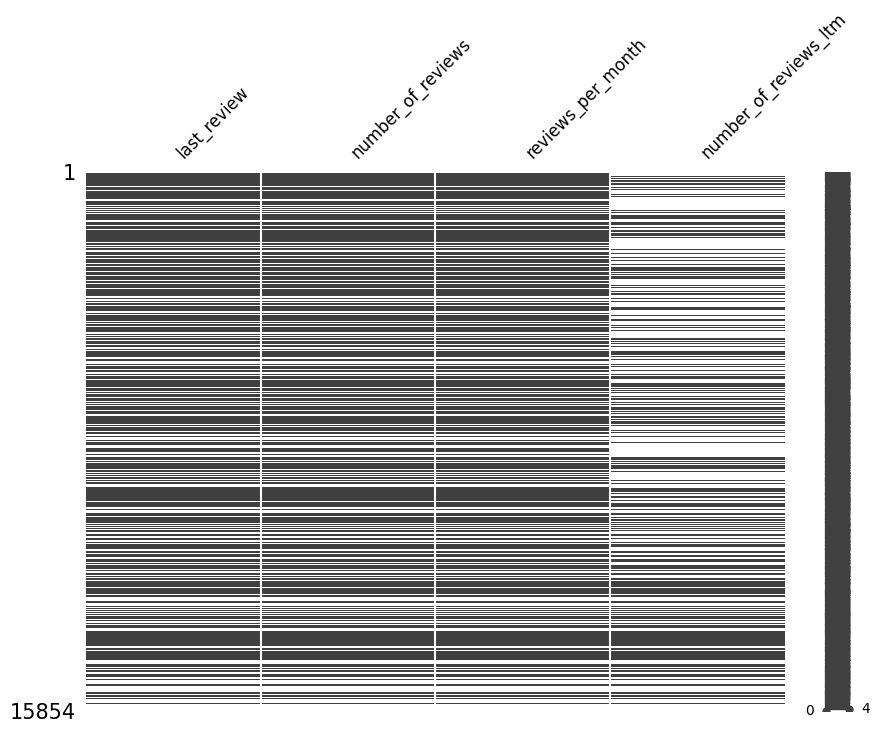

In [7]:
# Visualisasi data yang hilang pada kolom 'last_review' dan 'number_of_reviews'
temp_df = df.copy()
temp_df["number_of_reviews"].replace(0, np.nan, inplace=True)
temp_df["number_of_reviews_ltm"].replace(0, np.nan, inplace=True)

msno.matrix(temp_df[['last_review','number_of_reviews' ,'reviews_per_month',"number_of_reviews_ltm"]],figsize=(10,7),fontsize=12)
plt.show()

In [8]:
# Pengecekan manual untuk keselarasan kolom 'last_review' dan 'number_of_reviews'
print(f'1. Jumlah number_of_reviews null dan last_review null= {sum((temp_df["number_of_reviews"].isna()) & (temp_df["last_review"].isna()))}')
print(f'2. Jumlah number_of_reviews not null dan last_review null= {sum((temp_df["number_of_reviews"].notna()) & (temp_df["last_review"].isna()))}')
print(f'3. Jumlah number_of_reviews null dan last_review not null= {sum((temp_df["number_of_reviews"].isna()) & (temp_df["last_review"].notna()))}')


1. Jumlah number_of_reviews null dan last_review null= 5790
2. Jumlah number_of_reviews not null dan last_review null= 0
3. Jumlah number_of_reviews null dan last_review not null= 0


In [9]:
# Pengecekan manual untuk keselarasan kolom 'last_review' dan 'reviews_per_month'
print(f'1. Jumlah reviews_per_month null dan last_review null= {sum((temp_df["reviews_per_month"].isna()) & (temp_df["last_review"].isna()))}')
print(f'2. Jumlah reviews_per_month not null dan last_review null= {sum((temp_df["reviews_per_month"].notna()) & (temp_df["last_review"].isna()))}')
print(f'3. Jumlah reviews_per_month null dan last_review not null= {sum((temp_df["reviews_per_month"].isna()) & (temp_df["last_review"].notna()))}')


1. Jumlah reviews_per_month null dan last_review null= 5790
2. Jumlah reviews_per_month not null dan last_review null= 0
3. Jumlah reviews_per_month null dan last_review not null= 0


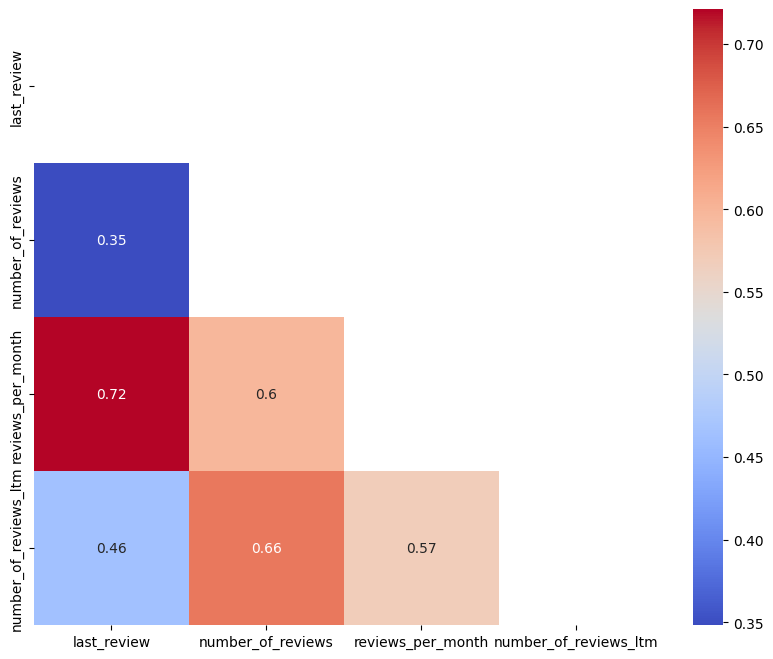

In [10]:
# Menghitung korelasi
korelasi = temp_df[['last_review', 'number_of_reviews', 'reviews_per_month', 'number_of_reviews_ltm']].corr(method='spearman')
mask = np.zeros_like(korelasi)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 8))
sns.heatmap(korelasi, mask =mask, annot=True, cmap='coolwarm')
plt.show()


**C. Modifying**

* **Mengganti nilai `last_review` yg NaN/null** dengan sentinel tgl 1000-1-1, dengan asumsi bahwa last_review yg NaN/null artinya belum pernah direview/tidak punya review sama sekali. *Alasan menggunakan tgl 1000-1-1* dalam asumsi jika nan/null digantikan dengan timestamp sekarang dikhawatirkan akan sama dengan listing yang pernah direview dengan listing yang belum pernah direview.

* **Mengganti nilai `host_name & name` yg NaN/null** dengan No_name, dikarenakan host_name yg null tidak memiliki duplikat (pada poin b diatas) pada host_id-nya agar bisa diinputkan dengan host_id yg sama. maka host_name tersebut diinputkan/dilabelkan dengan 'No_name'

In [11]:
# Mengganti nilai last_review yg NaN/null dengan menggunakan sentinel value menjadi 1000-1-1
df['last_review'] = df['last_review'].fillna(datetime(1000, 1, 1))


# Mengganti nilai name dan host_name yg NaN/null dengan No_name
df[["name","host_name"]] =df[["name","host_name"]].fillna('No_name')

# Mengganti reviews_per_month yg NaN/null dengan 0
df["reviews_per_month"]= df["reviews_per_month"].fillna(0)

### `2.3 Identifying numeric 0 or less than 1`

**A. Checking**

In [12]:
# Mencari variabel numerik dibawah 1
numeric_columns = df.select_dtypes(include= np.number).columns

pd.DataFrame({
    "0 amounts": (df[numeric_columns] <= 0).sum(),
    "0%": (df[numeric_columns] <= 0).sum()/len(df) *100
})

,0 amounts,0%
listing_id,0,0.000000
host_id,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
price,1,0.006308
minimum_nights,0,0.000000
number_of_reviews,5790,36.520752
reviews_per_month,5790,36.520752
calculated_host_listings_count,0,0.000000
availability_365,857,5.405576


<font color='blue'>Hasil kesimpulan tabel diatas:</font>
* **number_of_reviews, reviews_per_month, number_of_reviews_ltm**: wajar karena jika berisi 0 artinya belum pernah direview
* **Price**: tidak wajar, artinya host tersebut tidak memberikan price sama sekali

**B. Ensuring**

**Memastikan bahwa host yg memasang harga < 1**, tidak mempunyai listing lainnya/ listing hanya 1. Untuk dilakukan penghapusan,
artinya bila host yg memasang harga < 1, tetapi mempunyai listing lebih dari 1 maka, listing bisa di imputasi menggunakan metode x

In [13]:
host_id = df.loc[df['price'] < 1, 'host_id']
list_id_length = [df.loc[df['host_id'] == id, 'host_id'].value_counts() for id in list(host_id)]

result_df = pd.concat(list_id_length).reset_index()
result_df.columns = ['host_id', 'count']

result_df

,host_id,count
0,360620448,1


**c. Modifying**

In [14]:
# karena host 360620448 tersebut hanya mempunyai 1 listing maka, keputusannya adalah menghapus data tersebut
df.drop(df[df["host_id"] == 360620448].index,inplace=True)

### `2.4 Identifying duplicates`

**A. Checking**

In [15]:
# Menghitung jumlah duplikat pada variabel primary key
columns = ["listing_id","host_id"]
duplicatesCounts = {column: df.duplicated(subset=column).sum() for column in columns}
result = pd.DataFrame(list(duplicatesCounts.items()), columns=['Column', 'Duplicate Total'])
result

,Column,Duplicate Total
0,listing_id,0
1,host_id,9195


In [16]:
# Menghitung host_id yang duplikat terbanyak
df.groupby('host_id').size().reset_index(name='count').sort_values('count', ascending=False).query('count > 1')

,host_id,count
4490,201677068,228
2158,52161947,99
1135,26736483,89
4901,228535635,62
2537,68154488,62
...,...,...
1316,30747267,2
68,931710,2
881,21300947,2
845,20587003,2


**B. Ensuring**

In [17]:
# Memastikan pada duplikasi listing_id tidak terduplikat untuk setiap masing-masing host_id
dup= df.groupby('host_id')['listing_id'].apply(lambda x: x.duplicated().sum())
dup[dup > 0]

Series([], Name: listing_id, dtype: int64)

# **Data Successfully Cleaned**

In [18]:
# Menampilkan kolom, null_val, perentase dari null_val, jml_unique, sample_unique
pd.DataFrame(
    {
        'feature': df.columns.values,
        'data_type': df.dtypes.values,
        'null_value': [df[col].isna().sum() for col in df.columns],
        '%null_value': df.isna().mean().values * 100,
        'n_unique': df.nunique().values,
        'sample_unique': [df[col].unique() for col in df.columns]
    }
)

,feature,data_type,null_value,%null_value,n_unique,sample_unique
0,listing_id,int64,0,0.0,15853,"[27934, 27979, 28745, 35780, 941865, 1704776, ..."
1,name,object,0,0.0,14794,"[Nice room with superb city view, Easy going l..."
2,host_id,int64,0,0.0,6658,"[120437, 120541, 123784, 153730, 610315, 21296..."
3,host_name,object,0,0.0,5312,"[Nuttee, Emy, Familyroom, Sirilak, Kasem, Wimo..."
4,neighbourhood,object,0,0.0,50,"[Ratchathewi, Bang Na, Bang Kapi, Din Daeng, B..."
5,latitude,float64,0,0.0,9606,"[13.75983, 13.66818, 13.75232, 13.78823, 13.76..."
6,longitude,float64,0,0.0,10224,"[100.54134, 100.61674, 100.62402, 100.57256, 1..."
7,room_type,object,0,0.0,4,"[Entire home/apt, Private room, Hotel room, Sh..."
8,price,int64,0,0.0,3039,"[1905, 1316, 800, 1286, 1000, 1558, 1461, 700,..."
9,minimum_nights,int64,0,0.0,86,"[3, 1, 60, 7, 250, 2, 15, 30, 28, 21, 27, 4, 1..."


# **Data Analysis**

## **Booking Analysis Berdasarkan Wilayah**

Booking analysis merupakan analisa untuk melakukan observasi berdasarkan wilayah mana yang mempunyai minat penyewaan yang tinggi dan juga memberikan informasi terkait pertimngan variabel minimum penyewaan dan variabel harga

In [19]:
booking_df = df.copy()
# Rumus booking rate
booking_df["booking_rate"] = (365 - booking_df["availability_365"]) / 365 *100      # Jika availability_365 menunjunkan 365 berarti tidak ada booking, dan jika availability_365 0 maka booking penuh

In [20]:
#Desc statistic
booking_df["availability_365"].describe().round(0)

count    15853.0
mean       244.0
std        126.0
min          0.0
25%        138.0
50%        309.0
75%        360.0
max        365.0
Name: availability_365, dtype: float64

**A. Distribusi Data**

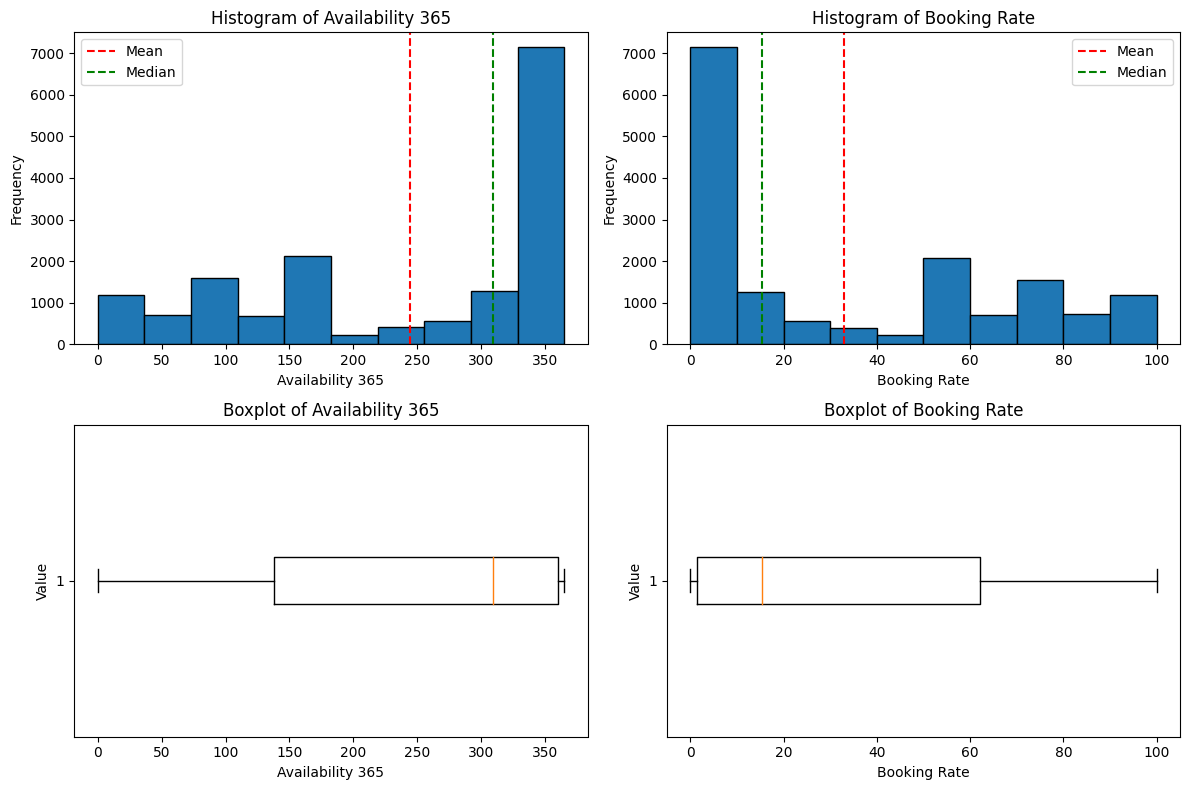

In [21]:
availability_365 = booking_df["availability_365"]
booking_rate = booking_df["booking_rate"]
variables = [("Availability 365", availability_365), ("Booking Rate", booking_rate)]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, (variable_name, data) in enumerate(variables):
    # Histogram
    axes[i].hist(data, bins=10, edgecolor='k')
    axes[i].set_xlabel(variable_name)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of {variable_name}')
    axes[i].axvline(data.mean(), color='red', linestyle='--', label='Mean')
    axes[i].axvline(data.median(), color='green', linestyle='--', label='Median')
    axes[i].legend()

    #Boxplot
    axes[i+2].boxplot(data, vert=False)
    axes[i+2].set_xlabel(variable_name)
    axes[i+2].set_ylabel('Value')
    axes[i+2].set_title(f'Boxplot of {variable_name}')

plt.tight_layout()
plt.show()


Distribusi diatas menyatakan bahwa distribusi skew pada variabel Availability dan booking rate, terlihat bahwa data banyak terdistribusi 350-365 pada data avaibility_365 dan booking rate banyak di angka 0, itu artinya banyak host yang sepi pada jasa penyewaannya

<hr style="position: relative;
        top: 20px;
        border: none;
        height: 12px;
        background: black;
        margin-bottom: 50px;">

#### `1. Berdasarkan wilayah/neigbourhood`

**A. Top 10 wilayah dengan booking rate tertinggi**

10 wilayah dengan booking rate tertinggi merupakan peringkat wilayah dengan booking rate tertinggi, referensi ini cocok untuk host yang langsung menyimpulkan bahwa wilayah booking rate tertinggi itu yang terbaik tanpa mempertimbangkan jumlah proporsi tempat penyewaan/ saingan host lainnya.

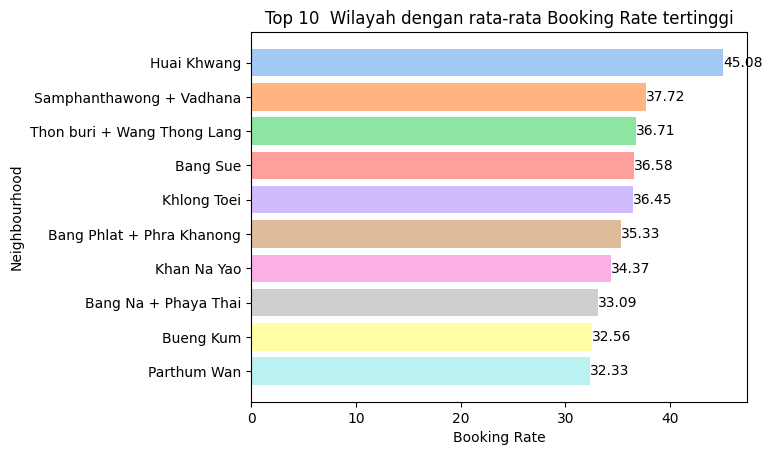

In [22]:
booking_rate_neighbourhood = booking_df.groupby("neighbourhood")["booking_rate"].mean().reset_index()
proporsi = (booking_df['neighbourhood'].value_counts() / len(booking_df)).reset_index()
proporsi.columns = ["neighbourhood", "proportion"]
rasio = pd.merge(booking_rate_neighbourhood[["booking_rate", "neighbourhood"]], proporsi[["proportion", "neighbourhood"]], on='neighbourhood')
rasio["rasio_total"] = (rasio.booking_rate / rasio.proportion)
rasio['concat_label'] = rasio['neighbourhood']

for i in range(len(rasio)):
    if rasio.loc[i, 'concat_label'] != '':
        concat_label = rasio.loc[i, 'concat_label']
        for j in range(i + 1, len(rasio)):
            if rasio.loc[j, 'concat_label'] != '':
                diff = abs(rasio.loc[i, 'booking_rate'] - rasio.loc[j, 'booking_rate'])
                if diff <= 0.1:
                    concat_label += ' + ' + rasio.loc[j, 'neighbourhood']
                    rasio.at[j, 'concat_label'] = ''
        rasio.at[i, 'concat_label'] = concat_label

rasio = rasio[rasio['concat_label'] != '']
rasio_sorted_1 = rasio.sort_values('booking_rate', ascending=False).head(10) 

plt.barh(rasio_sorted_1['concat_label'], rasio_sorted_1['booking_rate'], color=sns.color_palette('pastel'))
plt.xlabel('Booking Rate')
plt.ylabel('Neighbourhood')
plt.title('Top 10  Wilayah dengan rata-rata Booking Rate tertinggi')
plt.gca().invert_yaxis()

for i, booking_rate in enumerate(rasio_sorted_1['booking_rate']):
    plt.text(booking_rate, i, f"{booking_rate:.2f}", ha='left', va='center')

plt.show()


**B. Top 10 wilayah dengan berdasarkan Rasio Total**

10 wilayah dengan berdasarkan Rasio Total merupakan peringkat wilayah dengan booking rate tertinggi dan juga membandingkan jumlah proporsi tempat penyewaan/ saingan host lainnya, referensi ini cocok untuk host yang mempertimbangkan booking rate tertinggi dan juga mempertimbangkan resiko dari sisi proporsi saingan pasar.

*Note*: rasio total didapatkan booking rate / jml proporsi jml tempat penyewaan dalam setiap wilayahnya

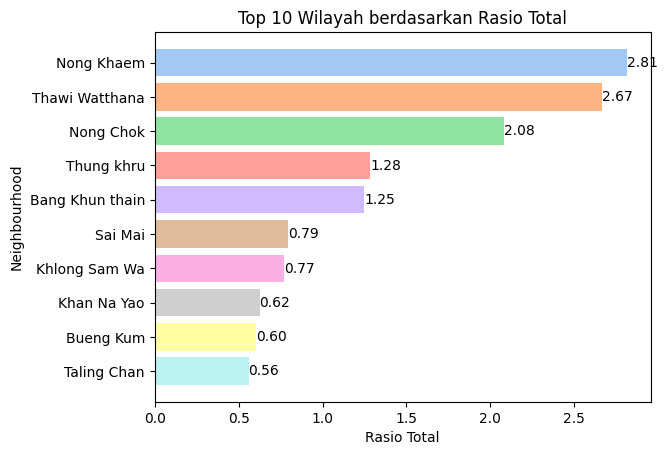

In [23]:
booking_rate_neighbourhood = booking_df.groupby("neighbourhood")["booking_rate"].mean().reset_index()
neigh_amounts = (booking_df['neighbourhood'].value_counts()).reset_index()
neigh_amounts.columns = ["neighbourhood", "proportion"]
rasio = pd.merge(booking_rate_neighbourhood[["booking_rate", "neighbourhood"]], neigh_amounts[["proportion", "neighbourhood"]], on='neighbourhood')
rasio["rasio_total"] = (rasio.booking_rate / rasio.proportion)
rasio['concat_label'] = rasio['neighbourhood']

for i in range(len(rasio)):
    if rasio.loc[i, 'concat_label'] != '':
        concat_label = rasio.loc[i, 'concat_label']
        for j in range(i + 1, len(rasio)):
            if rasio.loc[j, 'concat_label'] != '':
                diff = abs(rasio.loc[i, 'rasio_total'] - rasio.loc[j, 'rasio_total'])
                if diff <= 0:
                    concat_label += ' + ' + rasio.loc[j, 'neighbourhood']
                    rasio.at[j, 'concat_label'] = ''
        rasio.at[i, 'concat_label'] = concat_label

rasio = rasio[rasio['concat_label'] != '']

rasio_sorted_2 = rasio.sort_values('rasio_total', ascending=False).head(10)

plt.barh(rasio_sorted_2['concat_label'], rasio_sorted_2['rasio_total'], color=sns.color_palette('pastel'))
plt.xlabel('Rasio Total')
plt.ylabel('Neighbourhood')
plt.title('Top 10 Wilayah berdasarkan Rasio Total')
plt.gca().invert_yaxis()

for i, rasio_total in enumerate(rasio_sorted_2['rasio_total']):
    plt.text(rasio_total, i, f"{rasio_total:.2f}", ha='left', va='center')

plt.show()



> ##### <font color='green'>**Asumsi**:</font> **Apakah ada perbedaan signifikan antara rata-rata booking rate di 10 wilayah berdasarkan booking rate tertinggi dengan 10 wilayah berdasarkan rasio total?**

* H0: Tidak ada perbedaan signifikan antara antara rata-rata booking rate di 10 wilayah berdasarkan booking rate tertinggi dengan 10 wilayah berdasarkan rasio total

* H1: Terdapat perbedaan signifikan antara rata-rata booking rate di 10 wilayah berdasarkan booking rate tertinggi dengan 10 wilayah berdasarkan rasio total

In [24]:
stat, p = stats.shapiro(rasio_sorted_1["booking_rate"])

if p > 0.05:
    print('10 wilayah berdasarkan booking rate tertinggi adalah NORMAL.')
else:
    print('10 wilayah berdasarkan booking rate tertinggi adalah TIDAK NORMAL.')

stat, p = stats.shapiro(rasio_sorted_2["booking_rate"])
if p > 0.05:
    print('10 wilayah berdasarkan rasio total adalah NORMAL.')
else:
    print('10 wilayah berdasarkan rasio total adalah TIDAK NORMAL.')

10 wilayah berdasarkan booking rate tertinggi adalah TIDAK NORMAL.
10 wilayah berdasarkan rasio total adalah NORMAL.


> ##### <font color='purple'>**Uji Asumsi**</font> (Mann Whitney U)

In [25]:
# Karena salah satu variabel adalah TIDAK NORMAL dan unpaired maka menggunakan uji mann whitney u
br= booking_rate_neighbourhood.sort_values("booking_rate", ascending=False).reset_index(drop=True)

statistic, p_value = stats.mannwhitneyu(
   rasio_sorted_1["booking_rate"],
    rasio_sorted_2["booking_rate"],
    alternative="two-sided"
)

print("Nilai p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("H0 tidak ditolak, (Tidak Terdapat perbedaan signifikan antara rata-rata booking rate di 10 wilayah berdasarkan booking rate tertinggi dengan 10 wilayah berdasarkan rasio total)")
else:
    print("H0 ditolak, (Terdapat perbedaan signifikan antara rata-rata booking rate di 10 wilayah berdasarkan booking rate tertinggi dengan 10 wilayah berdasarkan rasio total)")


Nilai p-value: 0.0007615179826145427
H0 ditolak, (Terdapat perbedaan signifikan antara rata-rata booking rate di 10 wilayah berdasarkan booking rate tertinggi dengan 10 wilayah berdasarkan rasio total)


> ##### <font color='blue'> **Kesimpulan**:</font> Adanya perbedaan signifikan
##### Rata-rata booking rate antara 10 wilayah berdasarkan booking rate tertinggi dengan 10 wilayah berdasarkan rasio total `adanya perbedaan signifikan` berarti booking rate di wilayah berdasarkan booking rate tertinggi dengan wilayah berdasarkan rasio total sangat berbeda


**C. Referensi proporsi perbandingan jml jasa penyewaan berdasarkan wilayahnya**

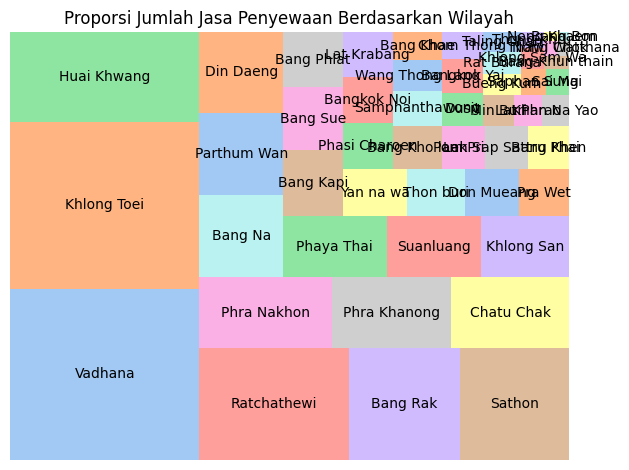

In [26]:
booking_rate_neighbourhood = booking_df.groupby("neighbourhood")["booking_rate"].mean().reset_index()

proporsi = (booking_df['neighbourhood'].value_counts() / len(booking_df) * 100).reset_index()
proporsi.columns = ["neighbourhood", "proportion"]
proporsi = proporsi.merge(booking_rate_neighbourhood[["booking_rate","neighbourhood"]],on="neighbourhood")

colors = sns.color_palette("pastel")[:len(proporsi)]
squarify.plot(sizes=proporsi["proportion"], label=proporsi["neighbourhood"], color=colors)
plt.axis('off')
plt.title("Proporsi Jumlah Jasa Penyewaan Berdasarkan Wilayah")

plt.tight_layout()
plt.show()


Bisa kita lihat bahwa wilayah seperti Vadhana, Khlong Toei, dan Huai Khwang merupakan wilayah yang saingan pasarnya tinggi, dimana ketiga wilayah tersebut termasuk 10 wilayah booking rate tertinggi, namun dengan resiko pesaing pasar yang tinggi juga. Namun hal itu perlu diuji hipotesis yakni perbedaan signifikan antara rata-rata booking rate di 10 wilayah berdasarkan booking rate tertinggi dan rasio total dengan 10 wilayah jumlah jasa penyewaan/listing terbanyak dan

> ##### <font color='green'>**Asumsi 1**:</font> **Apakah ada perbedaan signifikan antara rata-rata booking rate di 10 wilayah berdasarkan booking rate tertinggi dengan 10 wilayah jumlah jasa penyewaan/listing terbanyak?**

* H0: Tidak ada perbedaan signifikan antara antara rata-rata booking rate di 10 wilayah berdasarkan booking rate tertinggi dengan 10 wilayah jumlah jasa penyewaan/listing terbanyak

* H1: Terdapat perbedaan signifikan antara rata-rata booking rate di 10 wilayah berdasarkan booking rate tertinggi dengan 10 wilayah jumlah jasa penyewaan/listing terbanyak


> ##### <font color='purple'>**Uji Asumsi 1**</font> (Mann Whitney U)

In [27]:
stat, p = stats.shapiro(rasio_sorted_1["booking_rate"])

if p > 0.05:
    print('10 wilayah berdasarkan booking rate tertinggi adalah NORMAL.')
else:
    print('10 wilayah berdasarkan booking rate tertinggi adalah TIDAK NORMAL.')

stat, p = stats.shapiro(proporsi["booking_rate"])
if p > 0.05:
    print('10 wilayah berdasarkan jumlah jasa penyewaan/listing terbanyak adalah NORMAL.')
else:
    print('10 wilayah berdasarkan jumlah jasa penyewaan/listing terbanyak adalah TIDAK NORMAL.')

10 wilayah berdasarkan booking rate tertinggi adalah TIDAK NORMAL.
10 wilayah berdasarkan jumlah jasa penyewaan/listing terbanyak adalah TIDAK NORMAL.


In [28]:
# Karena kedua variabel tidak normal dan unpaired maka menggunakan uji mann whitney u
br= booking_rate_neighbourhood.sort_values("booking_rate", ascending=False).reset_index(drop=True)

statistic, p_value = stats.mannwhitneyu(
   rasio_sorted_1["booking_rate"],
    proporsi["booking_rate"],
    alternative="two-sided"
)

print("Nilai p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("H0 tidak ditolak, (Tidak Terdapat perbedaan signifikan antara rata-rata booking rate di 10 wilayah berdasarkan booking rate tertinggi dengan 10 wilayah jumlah jasa penyewaan/listing terbanyak)")
else:
    print("H0 ditolak, (Terdapat perbedaan signifikan antara rata-rata booking rate di 10 wilayah berdasarkan booking rate tertinggi dengan 10 wilayah jumlah jasa penyewaan/listing terbanyak)")


Nilai p-value: 0.0004627642029463496
H0 ditolak, (Terdapat perbedaan signifikan antara rata-rata booking rate di 10 wilayah berdasarkan booking rate tertinggi dengan 10 wilayah jumlah jasa penyewaan/listing terbanyak)


> ##### <font color='blue'> **Kesimpulan asumsi 1**:</font> Adanya perbedaan signifikan
#### Rata-rata booking rate antara 10 wilayah berdasarkan booking rate tertinggi dengan 10 wilayah berdasarkan jumlah jasa penyewaan/listing terbanyak `adanya perbedaan signifikan`

> ##### <font color='green'>**Asumsi 2**:</font> **Apakah ada perbedaan signifikan antara rata-rata booking rate di 10 wilayah berdasarkan rasio total tertinggi dengan 10 wilayah jumlah jasa penyewaan/listing terbanyak?**
* H0: Tidak ada perbedaan signifikan antara antara rata-rata booking rate di 10 wilayah berdasarkan rasio total tertinggi dengan 10 wilayah jumlah jasa penyewaan/listing terbanyak

* H1: Terdapat perbedaan signifikan antara rata-rata booking rate di 10 wilayah berdasarkan rasio total tertinggi dengan 10 wilayah jumlah jasa penyewaan/listing terbanyak

In [29]:
stat, p = stats.shapiro(rasio_sorted_2["booking_rate"])

if p > 0.05:
    print('10 wilayah berdasarkan rasio total tertinggi adalah NORMAL.')
else:
    print('10 wilayah berdasarkan rasio total tertinggi adalah TIDAK NORMAL.')

stat, p = stats.shapiro(proporsi["booking_rate"].head(10))
if p > 0.05:
    print('10 wilayah berdasarkan jumlah jasa penyewaan/listing terbanyak adalah NORMAL.')
else:
    print('10 wilayah berdasarkan jumlah jasa penyewaan/listing terbanyak adalah TIDAK NORMAL.')

10 wilayah berdasarkan rasio total tertinggi adalah NORMAL.
10 wilayah berdasarkan jumlah jasa penyewaan/listing terbanyak adalah NORMAL.


> ##### <font color='purple'>**Uji Asumsi 2**</font> (T-test unpaired)

In [30]:
# Karena kedua variabel normal dan unpaired maka menggunakan uji t-test unpaired
br= booking_rate_neighbourhood.sort_values("booking_rate", ascending=False).reset_index(drop=True)

statistic, p_value = stats.ttest_ind(
   rasio_sorted_2["booking_rate"],
    proporsi["booking_rate"],
    alternative="two-sided"
)

print("Nilai p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("H0 tidak ditolak, (Tidak Terdapat perbedaan signifikan antara rata-rata booking rate di 10 wilayah berdasarkan rasio tertinggi dengan booking rate di 10 wilayah jumlah jasa penyewaan/listing terbanyak)")
else:
    print("H0 ditolak, (Terdapat perbedaan signifikan antara rata-rata booking rate di 10 wilayah berdasarkan rasio tertinggi dengan booking rate di 10 wilayah jumlah jasa penyewaan/listing terbanyak)")


Nilai p-value: 0.8907924376079387
H0 tidak ditolak, (Tidak Terdapat perbedaan signifikan antara rata-rata booking rate di 10 wilayah berdasarkan rasio tertinggi dengan booking rate di 10 wilayah jumlah jasa penyewaan/listing terbanyak)


> ##### <font color='blue'> **Kesimpulan asumsi 2**:</font> Tidak terdapat perbedaan signifikan
##### Rata-rata booking rate antara 10 wilayah berdasarkan rasio total tertinggi dengan 10 wilayah berdasarkan jumlah jasa penyewaan/listing terbanyak adanya `tidak ada perbedaan signifikan `berarti rasio total tertinggi di rata-rata booking rate di wilayah berdasarkan booking rate tertinggi dengan wilayah berdasarkan jumlah jasa penyewaan/listing terbanyak tidak berbeda


<hr style="position: relative;
        top: 20px;
        border: none;
        height: 12px;
        background: black;
        margin-bottom: 50px;">
        
### `2. Berdasarkan Minimum night`

In [31]:
minimum_stay = booking_df.minimum_nights.values

labels = ['Daily', 'Weekly', 'Monthly', '6-Month', 'Yearly', 'Extended Yearly']
bins = [0, 1, 7, 30, 180, 365, np.inf] 
binned_minimum_stay = pd.cut(minimum_stay, bins=bins, labels=labels)

binning_df = pd.DataFrame({"neighbourhood":booking_df.neighbourhood,'Minimum_Stay': minimum_stay, 'kategori_penyewaan': binned_minimum_stay, "Booking_rate": booking_df.booking_rate})

**A. Perbandingan proporsi tempat penyewaan dengan booking rate secara keseluruhan**

Perbandingan proporsi tempat penyewaan dengan booking rate merupakan gambaran dimana kebanyakan host memberikan minimum lamanya penyewaan selama daily/ 1 hari saja dan dilihat dari grafik yang paling sedikit adalah host yang memberikan minimum lamanya penyewaan selama extended year/lebih dari setahun. Jika dilihat grafik banyak konsumen yang menginap dalam weekly mingguan, dengan jumlah saingan 24,3%. referensi ini cocok untuk host yang langsung menyimpulkan bahwa waktu booking rate tertinggi itu yang terbaik tanpa mempertimbangkan jumlah proporsi penyewaan/ saingan host lainnya.


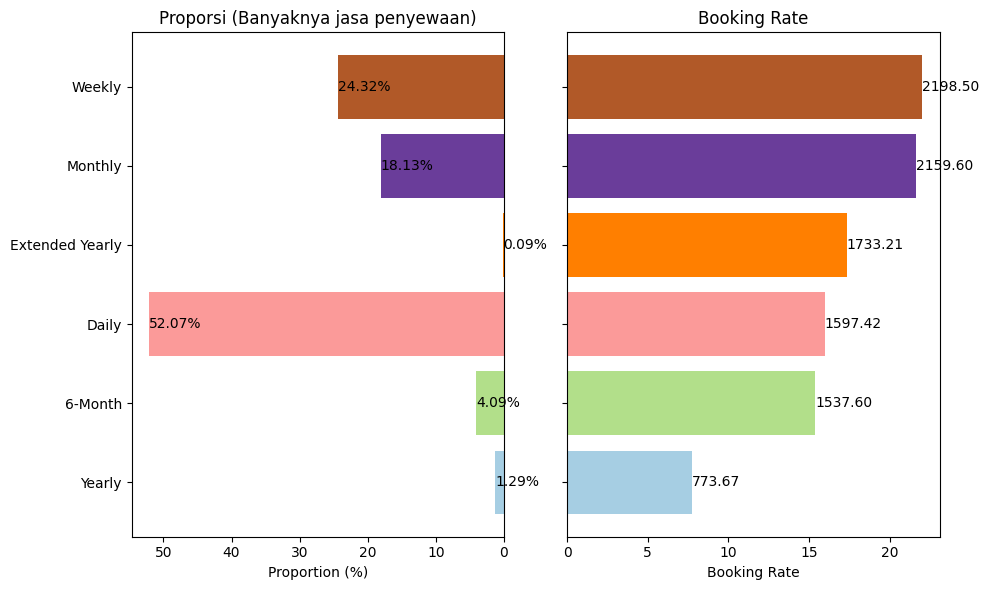

In [32]:
proporsi = (binning_df['kategori_penyewaan'].value_counts() / len(booking_df) * 100).reset_index()
proporsi.columns = ['kategori_penyewaan', 'Proporsi jml listing']

mean_booking_rate = binning_df.groupby("kategori_penyewaan")["Booking_rate"].mean()
mean_booking_rate = mean_booking_rate / sum(mean_booking_rate) * 100

result_df = pd.merge(proporsi, mean_booking_rate, on='kategori_penyewaan')
result_df = result_df.sort_values(by='Booking_rate', ascending=True)  

y = result_df["kategori_penyewaan"]
x1 = result_df["Proporsi jml listing"]
x2 = result_df["Booking_rate"]

cmap = plt.get_cmap('Paired')
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(10, 6))

bars1 = axes[0].barh(y, x1, align='center', color=cmap(np.linspace(0, 1, len(y))))
axes[0].invert_xaxis()
bars2 = axes[1].barh(y, x2, align='center', color=cmap(np.linspace(0, 1, len(y))))

axes[0].set_title('Proporsi (Banyaknya jasa penyewaan)')
axes[1].set_title('Booking Rate')
axes[0].set_xlabel('Proportion (%)')
axes[1].set_xlabel('Booking Rate')

for bar in bars1:
    width = bar.get_width()
    axes[0].text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', ha='left', va='center')
for bar in bars2:
    width = bar.get_width()
    axes[1].text(width, bar.get_y() + bar.get_height() / 2, f'{width * 100 :.2f}', ha='left', va='center')

plt.tight_layout()

plt.show()

berdasarkan grafik diatas bahwa proporsi host yang menyewakan tempat penginapan/listing tertinggi di daily yakni setengah dari jumlah keseluruhan data listing, 1/4 nya pada weekly, dan sisanya mempunyai proporsi sangat sedikit. Hal tersebut bisa diujikan dengan hipotesis proporsi menggunakan chi-square

**B. Perbandingan proporsi tempat penyewaan berdasarkan booking rate rasio secara keseluruhan**

Perbandingan proporsi tempat penyewaan dengan booking rate rasio mengoptimalkan booking rate dengan proporsi banyaknya saingan/jasa penyewaan. Hal ini bertujuan untuk 
host yang ingin persaingan pasar yg minim, terlihat bahwa extended yearly merupakan waktu penyewaan yang optimal
*Note*: rasio total didapatkan booking rate / jml proporsi jml tempat penyewaan dalam setiap wilayahnya

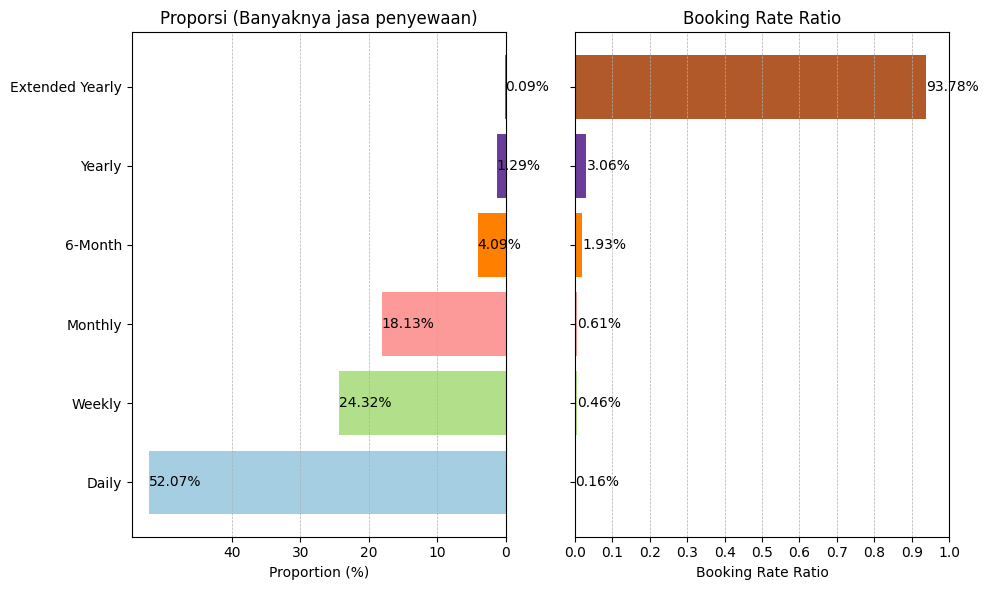

In [33]:
proporsi = (binning_df['kategori_penyewaan'].value_counts() / len(booking_df) * 100).reset_index()
proporsi.columns = ['kategori_penyewaan', 'Proporsi jml listing']

mean_booking_rate = binning_df.groupby("kategori_penyewaan")["Booking_rate"].mean()
mean_booking_rate = mean_booking_rate/ sum(mean_booking_rate) *100

result_df = pd.merge(proporsi, mean_booking_rate, on='kategori_penyewaan')
result_df['Booking_rate_ratio'] = (result_df['Booking_rate'] / result_df['Proporsi jml listing'])/sum(result_df['Booking_rate'] / result_df['Proporsi jml listing'])

y = result_df["kategori_penyewaan"]
x1 = result_df["Proporsi jml listing"]
x2 = (result_df["Booking_rate_ratio"])

cmap = plt.get_cmap('Paired')  
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(10, 6))

bars1 = axes[0].barh(y, x1, align='center', color=cmap(np.linspace(0, 1, len(y))))
axes[0].invert_xaxis()
bars2 = axes[1].barh(y, x2, align='center', color=cmap(np.linspace(0, 1, len(y))))

axes[0].set_title('Proporsi (Banyaknya jasa penyewaan)')
axes[1].set_title('Booking Rate Ratio')
axes[0].set_xlabel('Proportion (%)')
axes[1].set_xlabel('Booking Rate Ratio')

axes[0].xaxis.set_ticks(np.arange(0, 50, 10))
axes[1].xaxis.set_ticks(np.arange(0, max(x2) + 0.1, 0.1))
axes[0].xaxis.grid(True, linestyle='--', linewidth=0.5)
axes[1].xaxis.grid(True, linestyle='--', linewidth=0.5)

for bar in bars1:
    width = bar.get_width()
    axes[0].text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', ha='left', va='center')
for bar in bars2:
    width = bar.get_width()
    axes[1].text(width, bar.get_y() + bar.get_height() / 2, f'{width * 100 :.2f}%', ha='left', va='center')

plt.tight_layout()

plt.show()


**C. Proporsi minimum nights/ minimum lamanya penyewaan dengan 10 wilayah booking rate tertinggi secara berdasarkan per wilayahnya**

In [34]:
# Membuat tabel kontigensi untuk melihat jumlah proporsi lamanya penyewaan pada setiap wilayahnya
min_nights_neighbour = booking_rate_neighbourhood.sort_values("booking_rate",ascending=False).reset_index(drop=True).head(10)
min_nights_neighbour = min_nights_neighbour.merge(binning_df[["neighbourhood","kategori_penyewaan"]], on="neighbourhood")

crosstab = pd.crosstab(min_nights_neighbour["neighbourhood"], min_nights_neighbour["kategori_penyewaan"])
crosstab_df = pd.DataFrame(crosstab)
crosstab_df

kategori_penyewaan,Daily,Weekly,Monthly,6-Month,Yearly,Extended Yearly
neighbourhood,,,,,,
Bang Phlat,84,38,53,41,1,0
Bang Sue,61,88,80,15,5,1
Huai Khwang,531,276,256,45,17,0
Khan Na Yao,34,9,9,2,1,0
Khlong Toei,1001,625,354,93,23,1
Phra Khanong,251,145,120,32,10,0
Samphanthawong,107,7,0,0,0,0
Thon buri,69,45,50,16,1,1
Vadhana,906,639,511,69,24,3


> ##### <font color='green'>**Asumsi 1**:</font> **Apakah ada perbedaan signifikan antara proporsi lamanya penyewaan di setiap wilayahnya?**
* H0: Tidak ada perbedaan signifikan antara proporsi lamanya penyewaan di setiap wilayahnya

* H1: Terdapat perbedaan signifikan antara proporsi lamanya penyewaan di setiap wilayahnya

In [35]:
chi2, p_value, dof, expected = stats.chi2_contingency(crosstab)

print("P-value:", p_value)

if p_value < 0.05:
    print("H0 tidak ditolak. (Tidak ada hubungan yang signifikan antara proporsi lamanya penyewaan di setiap wilayahnya)")
else:
    print("H0 ditolak. (Terdapat perbedaan signifikan antara proporsi lamanya penyewaan di setiap wilayahnya)")

P-value: 3.106497639705345e-52
H0 tidak ditolak. (Tidak ada hubungan yang signifikan antara proporsi lamanya penyewaan di setiap wilayahnya)


> ##### <font color='purple'>**Uji Asumsi 1**</font> (Chi-Square)

> ##### <font color='blue'> **Kesimpulan asumsi 1**:</font> Tidak terdapat perbedaan signifikan
##### Artinya proporsi lamanya penyewaan Daily, Weekly, Monthly, 6-Month, Yearly, dan Extended Yearly tidak ada hubungan yang signifikan disetiap wilayahnya.

> ##### <font color='green'>**Asumsi 2**:</font> **Membandingkan apakah ada perbedaan signifikan antara rata-rata booking rate per lamanya penyewaan dengan nilai rata-rata booking rate pop mean (yang normal) dan pop median (non parametrik)?**
* H0: rata-rata booking rate lamanya penyewaan = nilai rata-rata booking rate pop mean (yang normal) dan pop median (non parametrik).

* H1: rata-rata booking rate lamanya penyewaan ≠ nilai rata-rata booking rate pop mean (yang normal) dan pop median (non parametrik)

*Note: nilai pop mean diambil dari rata-rata booking_rate per wilayahnya*

In [36]:
neighbourhoods = []
booking_rates = ['Daily', 'Weekly', 'Monthly', '6-Month', 'Yearly', 'Extended Yearly']
data = [[] for _ in range(len(booking_rates))]
is_normal=''

for neighbor in booking_rate_neighbourhood["neighbourhood"]:
    neighbor_data = binning_df[binning_df['neighbourhood'] == neighbor]
    for i, rate in enumerate(booking_rates):
        rate_data = neighbor_data[neighbor_data['kategori_penyewaan'] == rate]['Booking_rate'].tolist()
        if len(rate_data) >= 3:
            if max(rate_data) > min(rate_data):
                stat, p_value = stats.shapiro(rate_data)
                if p_value > 0.05:
                    is_normal="normal"
                else: 
                    is_normal="X"
        else:
            is_normal = "X"  
        data[i].append(is_normal)
    neighbourhoods.append(neighbor)

df_data = {'neighbourhood': neighbourhoods}
for i, rate in enumerate(booking_rates):
    df_data[rate] = data[i]

df = pd.DataFrame(df_data)
df.merge(booking_rate_neighbourhood ,on="neighbourhood").sort_values("booking_rate",ascending=False).head(10)

,neighbourhood,Daily,Weekly,Monthly,6-Month,Yearly,Extended Yearly,booking_rate
18,Huai Khwang,X,X,X,X,X,X,45.077626
39,Samphanthawong,X,normal,X,X,X,X,37.719298
47,Vadhana,X,X,X,X,X,normal,37.715410
48,Wang Thong Lang,X,X,normal,normal,X,X,36.786301
45,Thon buri,X,X,X,X,X,X,36.710823
9,Bang Sue,X,X,X,X,X,X,36.576438
22,Khlong Toei,X,X,X,X,X,X,36.454949
7,Bang Phlat,X,X,X,X,X,X,35.332365
32,Phra Khanong,X,X,X,X,X,X,35.323317
19,Khan Na Yao,X,normal,X,X,X,X,34.366127


> ##### <font color='purple'>**Uji Asumsi 2**</font> (1-sample t test normal) dist dan 1-sample wilcoxon (non paramteric)

> ##### <font color='blue'> **Tabel hasil signifikansi dari 1 variabel terhadap mean populasi/median populasi**</font>

In [37]:
neighbourhoods = []
booking_rates = ['Daily', 'Weekly', 'Monthly', '6-Month', 'Yearly', 'Extended Yearly']
data = [[] for _ in range(len(booking_rates))]

for neighbor in booking_rate_neighbourhood["neighbourhood"]:
    neighbor_data = binning_df[binning_df['neighbourhood'] == neighbor]
    for i, rate in enumerate(booking_rates):
        rate_data = neighbor_data[neighbor_data['kategori_penyewaan'] == rate]['Booking_rate'].tolist()
        if len(rate_data) >= 3:
            if max(rate_data) > min(rate_data):
                stat, p_value = stats.shapiro(rate_data)
                is_normal = p_value > 0.05
                if is_normal:
                    t_stat, p_value = stats.ttest_1samp(rate_data, popmean=booking_rate_neighbourhood[booking_rate_neighbourhood['neighbourhood'] == neighbor]['booking_rate'])
                    test_result = ("X" if p_value > 0.05 else "Signifikan")
                else:
                    test_stat, p_value = stats.wilcoxon(rate_data) 
                    test_result = ("X" if p_value > 0.05 else "Signifikan")
            else:
                test_result = "X"
        else:
            test_result = "X"
        data[i].append(test_result)
    neighbourhoods.append(neighbor)

df_data = {'neighbourhood': neighbourhoods}
for i, rate in enumerate(booking_rates):
    df_data[rate] = data[i]

df = pd.DataFrame(df_data)
result_df = df.merge(booking_rate_neighbourhood, on="neighbourhood").sort_values("booking_rate", ascending=False).head(10)
result_df

c:\Users\FarizIkhsan\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\FarizIkhsan\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,neighbourhood,Daily,Weekly,Monthly,6-Month,Yearly,Extended Yearly,booking_rate
18,Huai Khwang,Signifikan,Signifikan,Signifikan,Signifikan,Signifikan,X,45.077626
39,Samphanthawong,Signifikan,X,X,X,X,X,37.719298
47,Vadhana,Signifikan,Signifikan,Signifikan,Signifikan,Signifikan,X,37.715410
48,Wang Thong Lang,Signifikan,Signifikan,X,X,X,X,36.786301
45,Thon buri,Signifikan,Signifikan,Signifikan,Signifikan,X,X,36.710823
9,Bang Sue,Signifikan,Signifikan,Signifikan,Signifikan,X,X,36.576438
22,Khlong Toei,Signifikan,Signifikan,Signifikan,Signifikan,Signifikan,X,36.454949
7,Bang Phlat,Signifikan,Signifikan,Signifikan,Signifikan,X,X,35.332365
32,Phra Khanong,Signifikan,Signifikan,Signifikan,Signifikan,X,X,35.323317
19,Khan Na Yao,Signifikan,X,Signifikan,X,X,X,34.366127


**D. Menampilkan rata-rata booking rate berdasarkan minimum sewa**

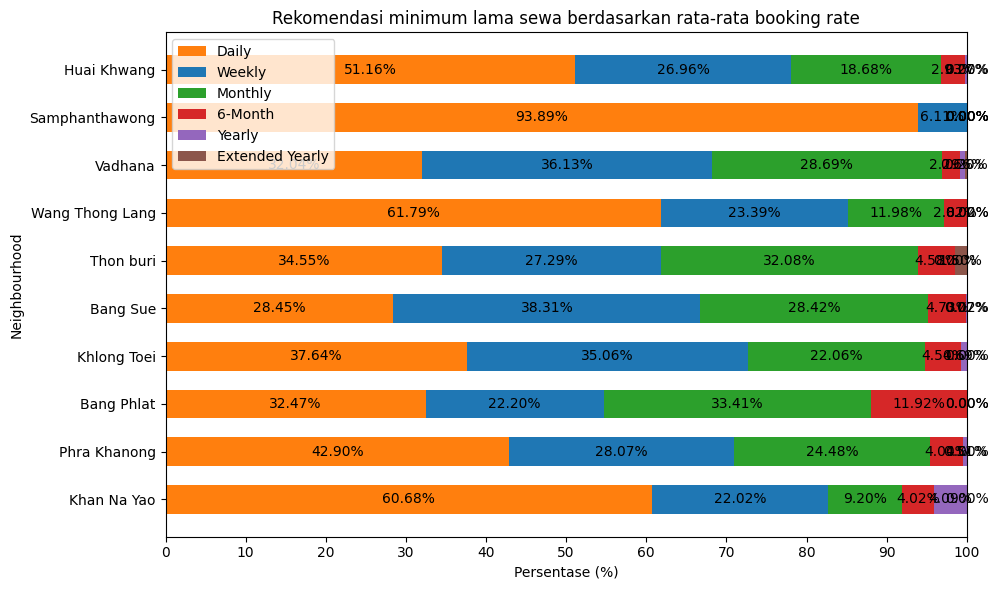

In [38]:
neighbourhoods = []
booking_rates = ['Daily', 'Weekly', 'Monthly', '6-Month', 'Yearly', 'Extended Yearly']
data = [[] for i in range(len(booking_rates))]

for neighbor in booking_rate_neighbourhood["neighbourhood"]:
    neighbor_data = binning_df[binning_df['neighbourhood'] == neighbor]
    for i, rate in enumerate(booking_rates):
        rate_data = neighbor_data[neighbor_data['kategori_penyewaan'] == rate]['Booking_rate'].tolist()
        data[i].append(sum(rate_data))
    neighbourhoods.append(neighbor)

df_data = {'neighbourhood': neighbourhoods}
for i, rate in enumerate(booking_rates):
    df_data[rate] = data[i]

df = pd.DataFrame(df_data)

df['total'] = df[booking_rates].sum(axis=1)

for rate in booking_rates:
    df[rate] = (df[rate] / df['total']) * 100
df = df.drop('total', axis=1)

df= df.merge(booking_rate_neighbourhood ,on="neighbourhood").sort_values("booking_rate",ascending=False).head(10)
plt.figure(figsize=(10, 6))

bottom = [0] * len(df)
for rate, color in zip(booking_rates, ['#ff7f0e', '#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#8c564b']):
    plt.barh(df['neighbourhood'], df[rate], 0.6, color=color, left=bottom)
    bottom = bottom + df[rate]

plt.xlabel('Persentase (%)')
plt.ylabel('Neighbourhood')
plt.title('Rekomendasi minimum lama sewa berdasarkan rata-rata booking rate')
plt.legend(booking_rates)
plt.xticks(range(0, 101, 10))
plt.gca().invert_yaxis()
plt.tight_layout()

for i, row in enumerate(df.iterrows()):
    y_pos = i
    x_pos = 0
    for rate in booking_rates:
        value = row[1][rate]
        plt.annotate(f'{value:.2f}%', xy=(x_pos + value / 2, y_pos), ha='center', va='center', color='black')
        x_pos += value

plt.show()

> ##### <font color='green'>**Asumsi 3**:</font> **Membandingkan apakah ada perbedaan signifikan antara rata-rata booking rate per Daily ,Weekly ,Monthly ,6-Month ,Yearly ,Extended Yearly?**
* H0: Tidak signifikan antara rata-rata booking rate per Daily ,Weekly ,Monthly ,6-Month ,Yearly ,Extended Yearly?.

* H1: Terdapat signifikan antara rata-rata booking rate per Daily ,Weekly ,Monthly ,6-Month ,Yearly ,Extended Yearly

In [39]:
neighbourhoods = []
booking_rates = ['Daily', 'Weekly', 'Monthly', '6-Month', 'Yearly', 'Extended Yearly']
data = [[] for _ in range(len(booking_rates))]
is_normal=''

for neighbor in booking_rate_neighbourhood["neighbourhood"]:
    neighbor_data = binning_df[binning_df['neighbourhood'] == neighbor]
    for i, rate in enumerate(booking_rates):
        rate_data = neighbor_data[neighbor_data['kategori_penyewaan'] == rate]['Booking_rate'].tolist()
        if len(rate_data) >= 3:
            if max(rate_data) > min(rate_data):
                stat, p_value = stats.shapiro(rate_data)
                if p_value > 0.05:
                    is_normal="normal"
                else: 
                    is_normal="X"
        else:
            is_normal = "X"  
        data[i].append(is_normal)
    neighbourhoods.append(neighbor)

df_data = {'neighbourhood': neighbourhoods}
for i, rate in enumerate(booking_rates):
    df_data[rate] = data[i]

df = pd.DataFrame(df_data)
df.merge(booking_rate_neighbourhood ,on="neighbourhood").sort_values("booking_rate",ascending=False).head(10)

,neighbourhood,Daily,Weekly,Monthly,6-Month,Yearly,Extended Yearly,booking_rate
18,Huai Khwang,X,X,X,X,X,X,45.077626
39,Samphanthawong,X,normal,X,X,X,X,37.719298
47,Vadhana,X,X,X,X,X,normal,37.715410
48,Wang Thong Lang,X,X,normal,normal,X,X,36.786301
45,Thon buri,X,X,X,X,X,X,36.710823
9,Bang Sue,X,X,X,X,X,X,36.576438
22,Khlong Toei,X,X,X,X,X,X,36.454949
7,Bang Phlat,X,X,X,X,X,X,35.332365
32,Phra Khanong,X,X,X,X,X,X,35.323317
19,Khan Na Yao,X,normal,X,X,X,X,34.366127


kerena ingin membandingkan antara booking rate Daily Weekly ,Monthly ,6-Month ,Yearly ,Extended Yearly per Daily ,Weekly ,Monthly ,6-Month ,Yearly ,Extended Yearly. dimana salah satu dari mereka tidak normal maka menggunakan wilcoxon

> ##### <font color='purple'>**Uji Asumsi 3**</font>  Uji Wilcoxon

> ##### <font color='blue'> **Tabel hasil signifikansi antara rata-rata booking rate per Daily ,Weekly ,Monthly ,6-Month ,Yearly ,Extended Yearly**</font>
pada tabel dibawah yang menunjukan booking-rate yang tidak signifikan artinya antara ke 6 variabel tersebut memiliki nilai yang tidak berbeda jauh, sebaliknya jika signifikan maka ada variabel yang bernilai besar yang berdampak kepada 6 variabel tersebut, dan pada visaulisasi diatas variabel daily yang kebanyakan memiliki persentase besar artinya booking rate tinggi di daily jika berdasarkan 10 wilayah booking rate tertinggi

In [40]:
neighbourhoods = []
booking_rates = ['Daily', 'Weekly', 'Monthly', '6-Month', 'Yearly', 'Extended Yearly']
data = [[] for i in range(len(booking_rates))]

for neighbor in booking_rate_neighbourhood["neighbourhood"]:
    neighbor_data = binning_df[binning_df['neighbourhood'] == neighbor]
    for i, rate in enumerate(booking_rates):
        rate_data = neighbor_data[neighbor_data['kategori_penyewaan'] == rate]['Booking_rate'].tolist()
        data[i].append(sum(rate_data))
    neighbourhoods.append(neighbor)

df_data = {'neighbourhood': neighbourhoods}
for i, rate in enumerate(booking_rates):
    df_data[rate] = data[i]

df = pd.DataFrame(df_data)

significant_result = []
for i, row in df.iterrows():
    row_data = row[booking_rates].tolist()
    row_data = [x for x in row_data if x != 0]
    statistic, p_value = stats.wilcoxon(row_data)
    significant_result.append(("Signifikan" if p_value > 0.05 else "X"))

df['Result'] = significant_result
result_df= df.merge(booking_rate_neighbourhood.sort_values("booking_rate", ascending=False)[["neighbourhood","booking_rate"]], on="neighbourhood", how="inner").sort_values("booking_rate", ascending=False).reset_index(drop=True)

result_df[["neighbourhood","Result"]].head(10)




,neighbourhood,Result
0,Huai Khwang,Signifikan
1,Samphanthawong,Signifikan
2,Vadhana,X
3,Wang Thong Lang,Signifikan
4,Thon buri,X
5,Bang Sue,X
6,Khlong Toei,Signifikan
7,Bang Phlat,Signifikan
8,Phra Khanong,Signifikan
9,Khan Na Yao,Signifikan


<hr style="position: relative;
        top: 20px;
        border: none;
        height: 12px;
        background: black;
        margin-bottom: 50px;">
        
### `3. Berdasarkan Harga`

In [41]:
top_neighborhood = pd.merge(booking_rate_neighbourhood[['booking_rate', 'neighbourhood']], booking_df[['price', 'neighbourhood']], on='neighbourhood', how="outer")

agg = top_neighborhood.groupby(by="neighbourhood").agg({"booking_rate":"first", "price":["max","min","mean","count"]})
agg.columns = ['booking_rate', 'max_price', 'min_price',"avg_price","Jml tempat penyawaan"] 
agg = agg.reset_index() 

In [42]:
temp_price_list = []

for neighbor in agg["neighbourhood"]:
    temp_price = {}

    neighbor_data = booking_df[booking_df['neighbourhood'] == neighbor][["price","booking_rate"]]
    kuartile = np.percentile(neighbor_data["price"], [0, 25, 50, 75, 100])

    price_ranges = [np.array(neighbor_data[(neighbor_data["price"] >= kuartile[i]) & (neighbor_data["price"] <= kuartile[i+1])]["price"]) for i in range(4)]
    booking_rate_ranges = [np.array(neighbor_data[(neighbor_data["price"] >= kuartile[i]) & (neighbor_data["price"] <= kuartile[i+1])]["booking_rate"]) for i in range(4)]

    temp_price["neighbourhood"] = neighbor
    temp_price["Budget"] = {"booking_rate": booking_rate_ranges[0], "price": price_ranges[0]}
    temp_price["Affordable"] = {"booking_rate": booking_rate_ranges[1], "price": price_ranges[1]}
    temp_price["Premium"] = {"booking_rate": booking_rate_ranges[2], "price": price_ranges[2]}
    temp_price["Luxury"] = {"booking_rate": booking_rate_ranges[3], "price": price_ranges[3]}

    temp_price_list.append(temp_price)

range_price_df = pd.DataFrame(temp_price_list)

**A. Tabel rata-rata booking rate berdasarkan kategori price range**

In [43]:
rows = []

for neighbor_data in temp_price_list:
    row = {}
    neighbor = neighbor_data["neighbourhood"]
    row['neighbourhood'] = neighbor

    for category in ['Budget', 'Affordable', 'Premium', 'Luxury']:
        booking_rate_data = neighbor_data[category]['booking_rate']
        avg_booking_rate = np.mean(booking_rate_data)
        
        row[category] = avg_booking_rate

    rows.append(row)
    
result_df = pd.DataFrame(rows, columns=['neighbourhood', 'Budget', 'Affordable', 'Premium', 'Luxury'])
result_df= result_df.merge(agg.sort_values("booking_rate", ascending=False)[["neighbourhood","booking_rate"]], on="neighbourhood", how="inner").sort_values("booking_rate", ascending=False).reset_index(drop=True)
result= result_df.head(10)
result

,neighbourhood,Budget,Affordable,Premium,Luxury,booking_rate
0,Huai Khwang,38.709094,57.328767,39.950187,44.287146,45.077626
1,Samphanthawong,15.786490,25.698630,63.911195,47.000472,37.719298
2,Vadhana,36.054591,36.913984,42.330284,35.490107,37.715410
3,Wang Thong Lang,30.695890,31.243836,41.262231,41.412013,36.786301
4,Thon buri,52.905858,38.087671,27.438952,28.838594,36.710823
5,Bang Sue,32.349213,38.127172,38.499107,36.877582,36.576438
6,Khlong Toei,39.439008,38.700320,34.087773,33.612524,36.454949
7,Bang Phlat,42.502283,29.301370,23.018190,49.075965,35.332365
8,Phra Khanong,35.929818,37.904915,32.728467,34.223902,35.323317
9,Khan Na Yao,36.066536,38.943249,26.262231,37.925636,34.366127


In [44]:
rows = []

for neighbor_data in temp_price_list:
    row = {}
    neighbor = neighbor_data["neighbourhood"]
    row['neighbourhood'] = neighbor

    total_booking_rate = 0
    
    for category in ['Budget', 'Affordable', 'Premium', 'Luxury']:
        booking_rate_data = neighbor_data[category]['booking_rate']
        avg_booking_rate = np.mean(booking_rate_data)
        row[category] = avg_booking_rate
        total_booking_rate += avg_booking_rate
        
    for category in ['Budget', 'Affordable', 'Premium', 'Luxury']:
        row[category] /= total_booking_rate
        
    rows.append(row)

result_df = pd.DataFrame(rows, columns=['neighbourhood', 'Budget', 'Affordable', 'Premium', 'Luxury'])
result_df = result_df.merge(agg.sort_values("booking_rate", ascending=False)[["neighbourhood","booking_rate"]], on="neighbourhood", how="inner").sort_values("booking_rate", ascending=False).reset_index(drop=True)
result = result_df.head(10)



C:\Users\FarizIkhsan\AppData\Local\Temp\ipykernel_11692\3018602084.py:17: RuntimeWarning: invalid value encountered in scalar divide
  row[category] /= total_booking_rate


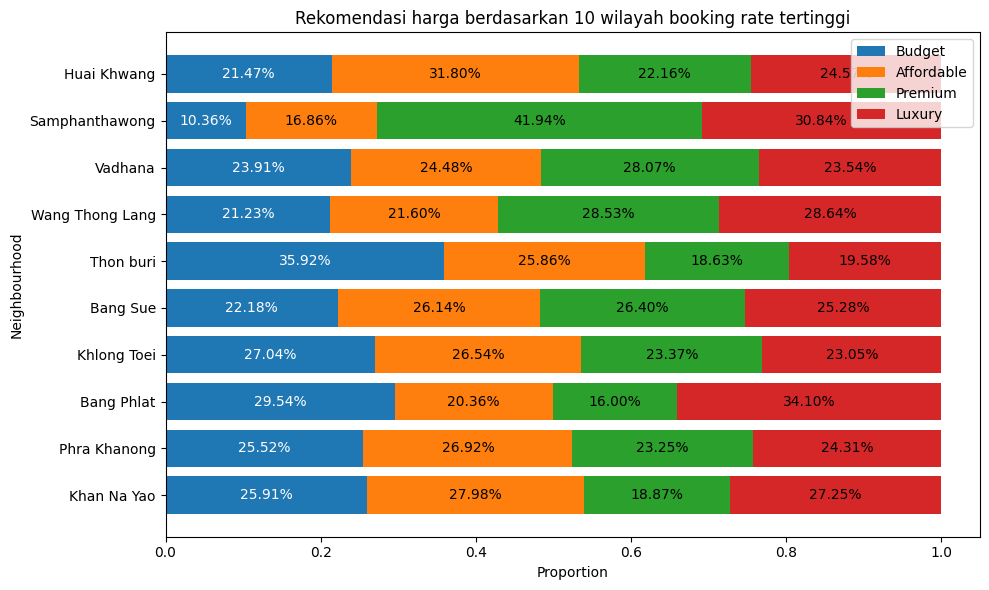

In [45]:
categories = ['Budget', 'Affordable', 'Premium', 'Luxury']
proportions = result[categories]

neighborhoods = result['neighbourhood']

fig, ax = plt.subplots(figsize=(10, 6))
y_pos = np.arange(len(neighborhoods))

budget_proportion = proportions['Budget']
affordable_proportion = proportions['Affordable']
premium_proportion = proportions['Premium']
luxury_proportion = proportions['Luxury']

bar_budget = ax.barh(y_pos, budget_proportion, color='tab:blue', label='Budget')
bar_affordable = ax.barh(y_pos, affordable_proportion, left=budget_proportion, color='tab:orange', label='Affordable')
bar_premium = ax.barh(y_pos, premium_proportion, left=budget_proportion + affordable_proportion, color='tab:green', label='Premium')
bar_luxury = ax.barh(y_pos, luxury_proportion, left=budget_proportion + affordable_proportion + premium_proportion, color='tab:red', label='Luxury')

plt.xlabel('Proportion')
plt.ylabel('Neighbourhood')
plt.title('Rekomendasi harga berdasarkan 10 wilayah booking rate tertinggi')
plt.legend()

for i in y_pos:
    ax.annotate(f'{budget_proportion[i]*100:.2f}%', xy=(budget_proportion[i] / 2, i), ha='center', va='center', color='white')
    ax.annotate(f'{affordable_proportion[i]*100:.2f}%', xy=(budget_proportion[i] + affordable_proportion[i] / 2, i), ha='center', va='center', color='black')
    ax.annotate(f'{premium_proportion[i]*100:.2f}%', xy=(budget_proportion[i] + affordable_proportion[i] + premium_proportion[i] / 2, i), ha='center', va='center', color='black')
    ax.annotate(f'{luxury_proportion[i]*100:.2f}%', xy=(budget_proportion[i] + affordable_proportion[i] + premium_proportion[i] + luxury_proportion[i] / 2, i), ha='center', va='center', color='black')
    
plt.gca().invert_yaxis()
plt.yticks(y_pos, neighborhoods)
plt.tight_layout()
plt.show()

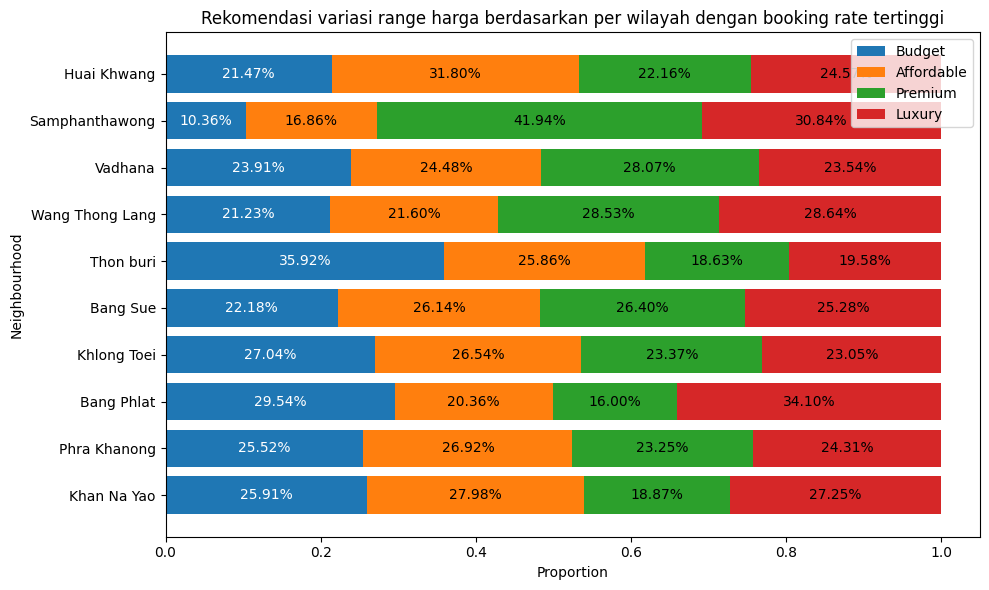

In [46]:
categories = ['Budget', 'Affordable', 'Premium', 'Luxury']
proportions = result[categories]

neighborhoods = result['neighbourhood']

fig, ax = plt.subplots(figsize=(10, 6))
y_pos = np.arange(len(neighborhoods))

bar_budget = ax.barh(y_pos, budget_proportion, color='tab:blue', label='Budget')
bar_affordable = ax.barh(y_pos, affordable_proportion, left=budget_proportion, color='tab:orange', label='Affordable')
bar_premium = ax.barh(y_pos, premium_proportion, left=budget_proportion + affordable_proportion, color='tab:green', label='Premium')
bar_luxury = ax.barh(y_pos, luxury_proportion, left=budget_proportion + affordable_proportion + premium_proportion, color='tab:red', label='Luxury')

plt.xlabel('Proportion')
plt.ylabel('Neighbourhood')
plt.title('Rekomendasi variasi range harga berdasarkan per wilayah dengan booking rate tertinggi')
plt.legend()

for i in y_pos:
    ax.annotate(f'{budget_proportion[i]*100:.2f}%', xy=(budget_proportion[i] / 2, i), ha='center', va='center', color='white')
    ax.annotate(f'{affordable_proportion[i]*100:.2f}%', xy=(budget_proportion[i] + affordable_proportion[i] / 2, i), ha='center', va='center', color='black')
    ax.annotate(f'{premium_proportion[i]*100:.2f}%', xy=(budget_proportion[i] + affordable_proportion[i] + premium_proportion[i] / 2, i), ha='center', va='center', color='black')
    ax.annotate(f'{luxury_proportion[i]*100:.2f}%', xy=(budget_proportion[i] + affordable_proportion[i] + premium_proportion[i] + luxury_proportion[i] / 2, i), ha='center', va='center', color='black')

plt.gca().invert_yaxis()

plt.yticks(y_pos, neighborhoods)

plt.tight_layout()
plt.show()

*Note: persenatse yang besar adalah booking rate tinggi*

> ##### <font color='green'>**Asumsi**:</font> **Membandingkan apakah ada perbedaan signifikan antara rata-rata booking rate variasi range harga?**
* H0: Tidak signifikan antara rata-rata booking rate per variasi harga

* H1: Terdapat signifikan antara rata-rata booking rate per variasi range harga

> ##### <font color='purple'>**Uji Asumsi**</font>  Uji Annova

> ##### <font color='blue'> **Tabel hasil signifikansi antara rata-rata booking rate per variasi harga**</font>
pada tabel dibawah yang menunjukan booking-rate yang tidak signifikan artinya antara ke 4 variabel tersebut memiliki nilai yang tidak berbeda jauh, sebaliknya jika signifikan maka ada variabel yang bernilai besar yang berdampak kepada 4 variabel pada setiap wilayahnya

In [47]:
rows = []

for neighbor_data in temp_price_list:
    row = {}
    neighbor = neighbor_data["neighbourhood"]
    row['neighbourhood'] = neighbor

    for category in ['Budget', 'Affordable', 'Premium', 'Luxury']:
        booking_rate_data = neighbor_data[category]['booking_rate']
        avg_booking_rate = np.mean(booking_rate_data)
        row[category] = avg_booking_rate
    
    category_values = [neighbor_data[category]['booking_rate'] for category in ['Budget', 'Affordable', 'Premium', 'Luxury']]
    f_statistic, p_value = stats.f_oneway(*category_values)
    row['Result'] = "Signifikan" if p_value < 0.05 else "X"
    
    rows.append(row)

result_df = pd.DataFrame(rows, columns=['neighbourhood', 'Budget', 'Affordable', 'Premium', 'Luxury', 'Result'])
result_df = result_df.merge(agg.sort_values("booking_rate", ascending=False)[["neighbourhood","booking_rate"]], on="neighbourhood", how="inner").sort_values("booking_rate", ascending=False).head(10)
result_df[["neighbourhood","Result"]].reset_index(drop=True)

c:\Users\FarizIkhsan\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:3895: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


,neighbourhood,Result
0,Huai Khwang,Signifikan
1,Samphanthawong,Signifikan
2,Vadhana,Signifikan
3,Wang Thong Lang,X
4,Thon buri,Signifikan
5,Bang Sue,X
6,Khlong Toei,Signifikan
7,Bang Phlat,Signifikan
8,Phra Khanong,X
9,Khan Na Yao,X


**B. Tabel referensi harga/ range harga (min, max, dan rata-rata)**

referensi ini merupakan pertimbangan harga pemasangan sewa secara sepesfik per masing-masing kategori harga. setelah sudah mendapat gamabaran di kategori harga mana yang persentase lebih tinggi di chart rekomendasi harga

In [48]:
rows = []

for neighbor_data in temp_price_list:
    row = {}
    neighbor = neighbor_data["neighbourhood"]
    row['neighbourhood'] = neighbor

    for category in ['Budget', 'Affordable', 'Premium', 'Luxury']:
        booking_rate_data = neighbor_data[category]['price']
        min_booking_rate = np.min(booking_rate_data)
        max_booking_rate = np.max(booking_rate_data)  
        mean_booking_rate = np.mean(booking_rate_data)  

        row[f'Min_{category}'] = min_booking_rate
        row[f'Max_{category}'] = max_booking_rate  
        row[f'Mean_{category}'] = mean_booking_rate  

    rows.append(row)

result_df = pd.DataFrame(rows, columns=['neighbourhood', 'Min_Budget', 'Max_Budget', 'Mean_Budget', 'Min_Affordable', 'Max_Affordable', 'Mean_Affordable', 'Min_Premium', 'Max_Premium', 'Mean_Premium', 'Min_Luxury', 'Max_Luxury', 'Mean_Luxury'])
result_df= result_df.merge(agg.sort_values("booking_rate", ascending=False)[["neighbourhood","booking_rate"]], on="neighbourhood", how="inner").sort_values("booking_rate", ascending=False).reset_index(drop=True)
result_agg= result_df.head(10)
result_agg

,neighbourhood,Min_Budget,Max_Budget,Mean_Budget,Min_Affordable,Max_Affordable,Mean_Affordable,Min_Premium,Max_Premium,Mean_Premium,Min_Luxury,Max_Luxury,Mean_Luxury,booking_rate
0,Huai Khwang,313,950,690.520833,950,1351,1122.563380,1351,2200,1671.024476,2200,1000000,16377.027875,45.077626
1,Samphanthawong,350,1134,794.931034,1200,2000,1603.000000,2000,2914,2393.206897,2951,15000,5844.758621,37.719298
2,Vadhana,350,1290,930.337662,1290,2000,1659.093063,2000,3463,2594.269373,3463,1100000,12629.020370,37.715410
3,Wang Thong Lang,315,570,460.680000,580,800,675.720000,830,2000,1438.000000,2000,12500,4083.423077,36.786301
4,Thon buri,320,750,554.553191,750,1120,893.300000,1120,1625,1328.086957,1700,161516,8182.369565,36.710823
5,Bang Sue,346,700,561.029851,700,900,794.611940,900,1380,1048.782609,1385,100000,4729.841270,36.576438
6,Khlong Toei,332,1173,868.533333,1173,1700,1420.195446,1700,2571,2025.231481,2571,1000000,12661.220952,36.454949
7,Bang Phlat,320,600,480.333333,600,900,764.083333,900,1600,1192.885246,1600,600700,22313.527273,35.332365
8,Phra Khanong,305,750,583.130137,750,1000,876.830065,1000,1600,1244.787671,1600,24242,3174.655172,35.323317
9,Khan Na Yao,356,700,510.642857,750,1156,852.571429,1156,1735,1478.000000,1800,26000,5595.285714,34.366127


# **Kesimpulan**
Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan berikut:</br>
* **Wilayah**
    * booking rate di 10 wilayah berdasarkan booking rate tertinggi sangat dipengaruhi banyaknya jumlah/kuantitas dari jasa penyewaan, namun
    * booking rate di 10 wilayah berdasarkan rasio (booking rate per wilayah/proporsi jml listing pada wilayah tsb) tertinggi tidak dipengaruhi banyaknya jumlah/kuantitas dari jasa penyewaan
</br></br>
* **Minimum night/ waktu penyewaan**
    * Analisis kesulurahan lisiting pada minimum night dari grafik terlihat bahwa weekly lebih tinggi booking ratenya, tetapi bila kita hitung rasio (booking rate waktu penyewaan/proporsi jml listing pada waktu penyewaan tsb) maka extended yearly yang lebih tinggi
    * Analisis secara 10 wilayah booking rate tertinggi pada minimum night justru daily memiliki booking rate yang dominan. artinya 10 wilayah booking rate tertinggi pada minimum night yakni pada waktu daily, sementara sisanya bukan dari 10 wilayah booking rate tertinggi</br></br>
    
* **Harga**
    * Perbandingan antar range variasi di 10 wilayah booking rate tertinggi harga terdapat 6 yang sangat perpengaruh anatar range variasi harga, sementara tidak terlalu berpengaruh terhadap range harga.

# **Menjawab pertanyaan dan rekomendasi host sebagai stakeholder**

1. Dari semua listing/ tempat penyewaan wilayah mana yang minat penyewaan/booking ratenya tertinggi?

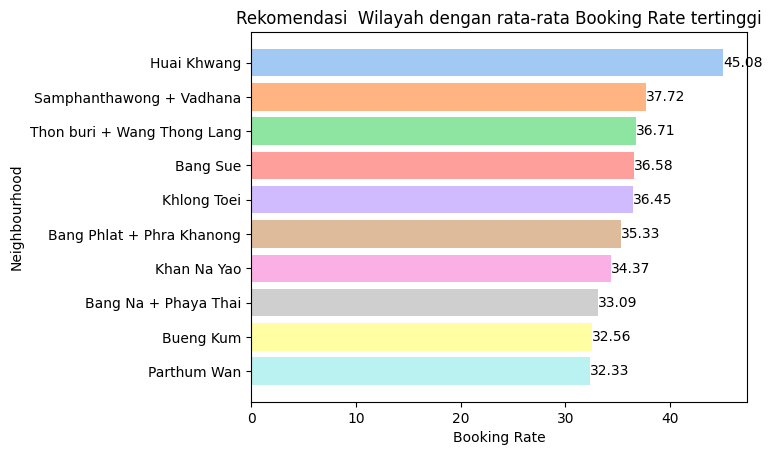

In [49]:
booking_rate_neighbourhood = booking_df.groupby("neighbourhood")["booking_rate"].mean().reset_index()
proporsi = (booking_df['neighbourhood'].value_counts() / len(booking_df)).reset_index()
proporsi.columns = ["neighbourhood", "proportion"]
rasio = pd.merge(booking_rate_neighbourhood[["booking_rate", "neighbourhood"]], proporsi[["proportion", "neighbourhood"]], on='neighbourhood')
rasio["rasio_total"] = (rasio.booking_rate / rasio.proportion)
rasio['concat_label'] = rasio['neighbourhood']

for i in range(len(rasio)):
    if rasio.loc[i, 'concat_label'] != '':
        concat_label = rasio.loc[i, 'concat_label']
        for j in range(i + 1, len(rasio)):
            if rasio.loc[j, 'concat_label'] != '':
                diff = abs(rasio.loc[i, 'booking_rate'] - rasio.loc[j, 'booking_rate'])
                if diff <= 0.1:
                    concat_label += ' + ' + rasio.loc[j, 'neighbourhood']
                    rasio.at[j, 'concat_label'] = ''
        rasio.at[i, 'concat_label'] = concat_label

rasio = rasio[rasio['concat_label'] != '']
rasio_sorted_1 = rasio.sort_values('booking_rate', ascending=False).head(10) 

plt.barh(rasio_sorted_1['concat_label'], rasio_sorted_1['booking_rate'], color=sns.color_palette('pastel'))
plt.xlabel('Booking Rate')
plt.ylabel('Neighbourhood')
plt.title('Rekomendasi  Wilayah dengan rata-rata Booking Rate tertinggi')
plt.gca().invert_yaxis()

for i, booking_rate in enumerate(rasio_sorted_1['booking_rate']):
    plt.text(booking_rate, i, f"{booking_rate:.2f}", ha='left', va='center')

plt.show()



**2. Jika saya sudah mengetahui wilayah yang penyewaan/booking ratenya tertinggi apakah wilayah tersebut sudah dibandingkan jumlah kompetitor di wilayah tersebut?**

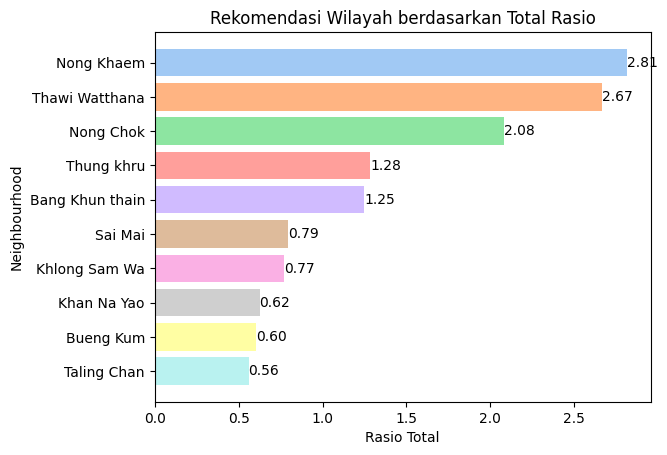

In [50]:
booking_rate_neighbourhood = booking_df.groupby("neighbourhood")["booking_rate"].mean().reset_index()
neigh_amounts = (booking_df['neighbourhood'].value_counts()).reset_index()
neigh_amounts.columns = ["neighbourhood", "proportion"]
rasio = pd.merge(booking_rate_neighbourhood[["booking_rate", "neighbourhood"]], neigh_amounts[["proportion", "neighbourhood"]], on='neighbourhood')
rasio["rasio_total"] = (rasio.booking_rate / rasio.proportion)
rasio['concat_label'] = rasio['neighbourhood']

for i in range(len(rasio)):
    if rasio.loc[i, 'concat_label'] != '':
        concat_label = rasio.loc[i, 'concat_label']
        for j in range(i + 1, len(rasio)):
            if rasio.loc[j, 'concat_label'] != '':
                diff = abs(rasio.loc[i, 'rasio_total'] - rasio.loc[j, 'rasio_total'])
                if diff <= 0:
                    concat_label += ' + ' + rasio.loc[j, 'neighbourhood']
                    rasio.at[j, 'concat_label'] = ''
        rasio.at[i, 'concat_label'] = concat_label

rasio = rasio[rasio['concat_label'] != '']

rasio_sorted_2 = rasio.sort_values('rasio_total', ascending=False).head(10)

plt.barh(rasio_sorted_2['concat_label'], rasio_sorted_2['rasio_total'], color=sns.color_palette('pastel'))
plt.xlabel('Rasio Total')
plt.ylabel('Neighbourhood')
plt.title('Rekomendasi Wilayah berdasarkan Total Rasio')
plt.gca().invert_yaxis()

for i, rasio_total in enumerate(rasio_sorted_2['rasio_total']):
    plt.text(rasio_total, i, f"{rasio_total:.2f}", ha='left', va='center')

plt.show()

pada grafik diatas nama wilayah yang ganda merepresentasikan rata-rata booking rate yang berselisih hanya 0.01

**3. Lantas supaya meningkatkan minat penyewaan/booking rate, kira-kira berapa minimum lama sewa dan harga yang saya harus pasang harus iklan?**

Pada persentase minimum night dan harga yang tertinggi merepresentasikan nilai rata-rata booking rate

#### `Rekomendasi minimum sewa berdasarkan wilayah`

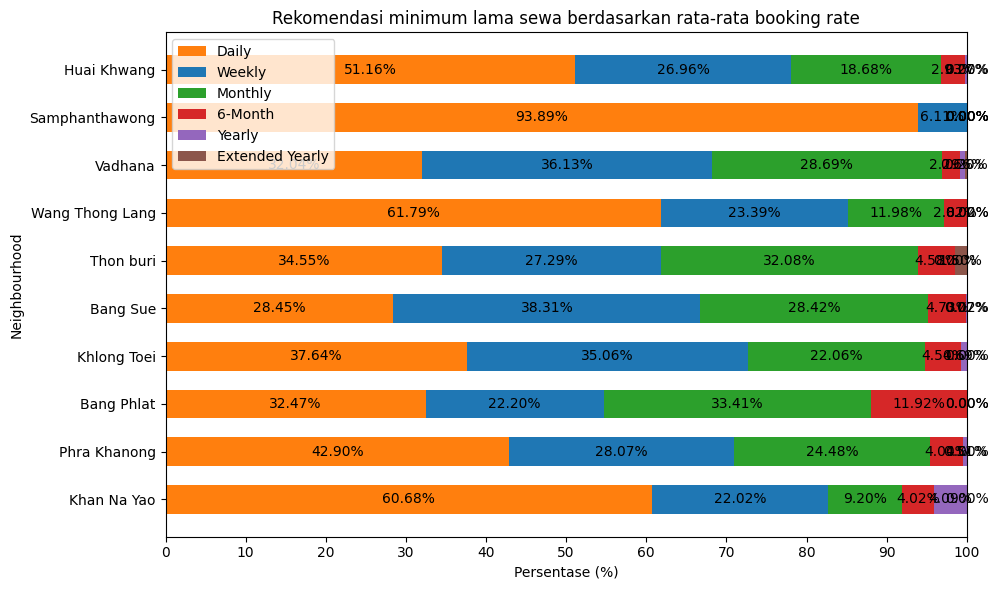

In [51]:
neighbourhoods = []
booking_rates = ['Daily', 'Weekly', 'Monthly', '6-Month', 'Yearly', 'Extended Yearly']
data = [[] for i in range(len(booking_rates))]

for neighbor in booking_rate_neighbourhood["neighbourhood"]:
    neighbor_data = binning_df[binning_df['neighbourhood'] == neighbor]
    for i, rate in enumerate(booking_rates):
        rate_data = neighbor_data[neighbor_data['kategori_penyewaan'] == rate]['Booking_rate'].tolist()
        data[i].append(sum(rate_data))
    neighbourhoods.append(neighbor)

df_data = {'neighbourhood': neighbourhoods}
for i, rate in enumerate(booking_rates):
    df_data[rate] = data[i]

df = pd.DataFrame(df_data)

df['total'] = df[booking_rates].sum(axis=1)

for rate in booking_rates:
    df[rate] = (df[rate] / df['total']) * 100
df = df.drop('total', axis=1)

df= df.merge(booking_rate_neighbourhood ,on="neighbourhood").sort_values("booking_rate",ascending=False).head(10)
plt.figure(figsize=(10, 6))

bottom = [0] * len(df)
for rate, color in zip(booking_rates, ['#ff7f0e', '#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#8c564b']):
    plt.barh(df['neighbourhood'], df[rate], 0.6, color=color, left=bottom)
    bottom = bottom + df[rate]

plt.xlabel('Persentase (%)')
plt.ylabel('Neighbourhood')
plt.title('Rekomendasi minimum lama sewa berdasarkan rata-rata booking rate')
plt.legend(booking_rates)
plt.xticks(range(0, 101, 10))
plt.gca().invert_yaxis()
plt.tight_layout()

for i, row in enumerate(df.iterrows()):
    y_pos = i
    x_pos = 0
    for rate in booking_rates:
        value = row[1][rate]
        plt.annotate(f'{value:.2f}%', xy=(x_pos + value / 2, y_pos), ha='center', va='center', color='black')
        x_pos += value

plt.show()

#### `Rekomendasi variasi harga berdasarkan wilayah`

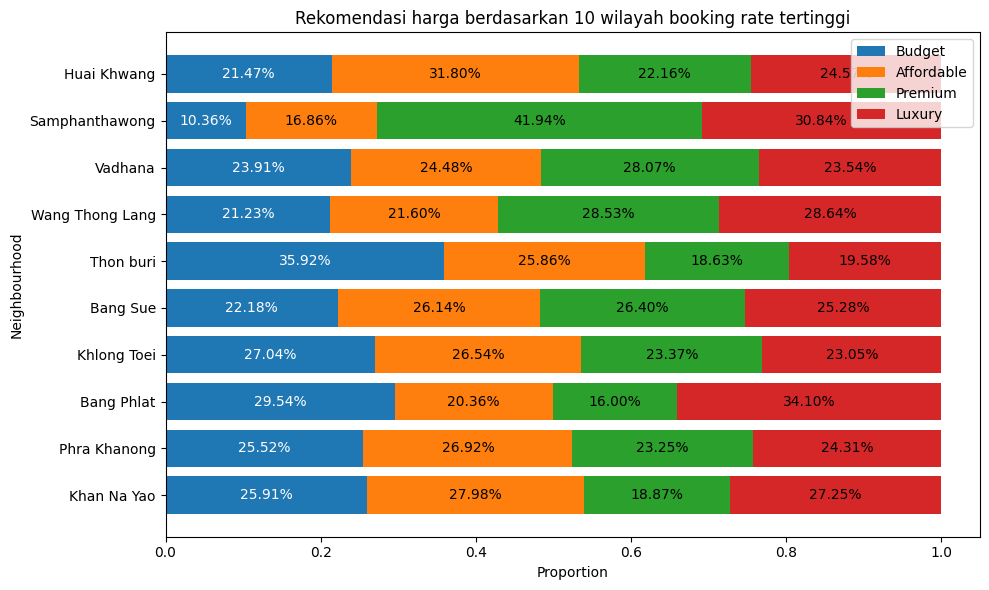

In [52]:
categories = ['Budget', 'Affordable', 'Premium', 'Luxury']
proportions = result[categories]

neighborhoods = result['neighbourhood']

fig, ax = plt.subplots(figsize=(10, 6))
y_pos = np.arange(len(neighborhoods))

budget_proportion = proportions['Budget']
affordable_proportion = proportions['Affordable']
premium_proportion = proportions['Premium']
luxury_proportion = proportions['Luxury']

bar_budget = ax.barh(y_pos, budget_proportion, color='tab:blue', label='Budget')
bar_affordable = ax.barh(y_pos, affordable_proportion, left=budget_proportion, color='tab:orange', label='Affordable')
bar_premium = ax.barh(y_pos, premium_proportion, left=budget_proportion + affordable_proportion, color='tab:green', label='Premium')
bar_luxury = ax.barh(y_pos, luxury_proportion, left=budget_proportion + affordable_proportion + premium_proportion, color='tab:red', label='Luxury')

plt.xlabel('Proportion')
plt.ylabel('Neighbourhood')
plt.title('Rekomendasi harga berdasarkan 10 wilayah booking rate tertinggi')
plt.legend()

for i in y_pos:
    ax.annotate(f'{budget_proportion[i]*100:.2f}%', xy=(budget_proportion[i] / 2, i), ha='center', va='center', color='white')
    ax.annotate(f'{affordable_proportion[i]*100:.2f}%', xy=(budget_proportion[i] + affordable_proportion[i] / 2, i), ha='center', va='center', color='black')
    ax.annotate(f'{premium_proportion[i]*100:.2f}%', xy=(budget_proportion[i] + affordable_proportion[i] + premium_proportion[i] / 2, i), ha='center', va='center', color='black')
    ax.annotate(f'{luxury_proportion[i]*100:.2f}%', xy=(budget_proportion[i] + affordable_proportion[i] + premium_proportion[i] + luxury_proportion[i] / 2, i), ha='center', va='center', color='black')
    
plt.gca().invert_yaxis()
plt.yticks(y_pos, neighborhoods)
plt.tight_layout()
plt.show()

#### `Tabel keterangan variasi harga berdasarkan wilayah`

In [53]:
rows = []

for neighbor_data in temp_price_list:
    row = {}
    neighbor = neighbor_data["neighbourhood"]
    row['neighbourhood'] = neighbor

    for category in ['Budget', 'Affordable', 'Premium', 'Luxury']:
        booking_rate_data = neighbor_data[category]['price']
        min_booking_rate = np.min(booking_rate_data)
        max_booking_rate = np.max(booking_rate_data)  
        mean_booking_rate = np.mean(booking_rate_data)  

        row[f'Min_{category}'] = min_booking_rate
        row[f'Max_{category}'] = max_booking_rate  
        row[f'Mean_{category}'] = mean_booking_rate  

    rows.append(row)

result_df = pd.DataFrame(rows, columns=['neighbourhood', 'Min_Budget', 'Max_Budget', 'Mean_Budget', 'Min_Affordable', 'Max_Affordable', 'Mean_Affordable', 'Min_Premium', 'Max_Premium', 'Mean_Premium', 'Min_Luxury', 'Max_Luxury', 'Mean_Luxury'])
result_df= result_df.merge(agg.sort_values("booking_rate", ascending=False)[["neighbourhood","booking_rate"]], on="neighbourhood", how="inner").sort_values("booking_rate", ascending=False).reset_index(drop=True)
result_agg= result_df.head(10)
result_agg

,neighbourhood,Min_Budget,Max_Budget,Mean_Budget,Min_Affordable,Max_Affordable,Mean_Affordable,Min_Premium,Max_Premium,Mean_Premium,Min_Luxury,Max_Luxury,Mean_Luxury,booking_rate
0,Huai Khwang,313,950,690.520833,950,1351,1122.563380,1351,2200,1671.024476,2200,1000000,16377.027875,45.077626
1,Samphanthawong,350,1134,794.931034,1200,2000,1603.000000,2000,2914,2393.206897,2951,15000,5844.758621,37.719298
2,Vadhana,350,1290,930.337662,1290,2000,1659.093063,2000,3463,2594.269373,3463,1100000,12629.020370,37.715410
3,Wang Thong Lang,315,570,460.680000,580,800,675.720000,830,2000,1438.000000,2000,12500,4083.423077,36.786301
4,Thon buri,320,750,554.553191,750,1120,893.300000,1120,1625,1328.086957,1700,161516,8182.369565,36.710823
5,Bang Sue,346,700,561.029851,700,900,794.611940,900,1380,1048.782609,1385,100000,4729.841270,36.576438
6,Khlong Toei,332,1173,868.533333,1173,1700,1420.195446,1700,2571,2025.231481,2571,1000000,12661.220952,36.454949
7,Bang Phlat,320,600,480.333333,600,900,764.083333,900,1600,1192.885246,1600,600700,22313.527273,35.332365
8,Phra Khanong,305,750,583.130137,750,1000,876.830065,1000,1600,1244.787671,1600,24242,3174.655172,35.323317
9,Khan Na Yao,356,700,510.642857,750,1156,852.571429,1156,1735,1478.000000,1800,26000,5595.285714,34.366127
